# 0. 데이터셋 및 전반적 지도 시각화

In [1]:
import folium
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from folium.features import CustomIcon

**0-1. 데이터셋**

In [98]:
#시계열 지역별 확진자,회복자,사망자데이터
df = pd.read_csv('/content/TimeProvince.csv')
#감염환자 데이터
PatientInfo=pd.read_csv("/content/PatientInfo.csv")
#감염경로 데이터
Day_infectioncase=pd.read_csv("/content/TimeProvince.csv")
#인구현황
population=pd.read_csv('/content/202001_202006_주민등록인구및세대현황_월간.csv',encoding = 'ISO-8859-1', thousands = ',')
#지도 그래프를 그리기 위한 데이터
data_draw_korea = pd.read_csv('/content/data_draw_korea.csv', index_col=0, encoding='UTF-8')
#20년1분기,2분기 의료기관 지역별 수
total_medical=pd.read_csv('/content/total_medical.csv')
#지역마다 감염경로 개수 데이터
infectioncase_perprovince=pd.read_csv('/content/infectioncase_perprovince.csv')

In [99]:
df.loc[507,'confirmed']=1
df.loc[507,'released']=0
df.loc[531,'released']=1
df_0630=df.loc[(df['date']=='2020-06-30')] #지도 데이터에 사용할 데이터

**0-2. 의료기관 수, 마지막 날 확진자, 사망자, 회복자 지도 그래프**

In [4]:
#출처 https://pinkwink.kr/1005?category=580892
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

Unknown system... sorry~~~~


In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/content/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

f_path = "/content/NanumBarunGothic.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

def drawKorea(targetData, blockedMap, d1, d2, cmapname, what):
    gamma = 0.75
    data_draw_korea.loc[(data_draw_korea['광역시도']=='부산광역시'),'인구수']=int(df_0630.loc[(df_0630['province']=='Busan'),what])
    data_draw_korea.loc[(data_draw_korea['광역시도']=='서울특별시'),'인구수']=int(df_0630.loc[(df_0630['province']=='Seoul'),what])
    data_draw_korea.loc[(data_draw_korea['광역시도']=='경기도'),'인구수']=int(df_0630.loc[(df_0630['province']=='Gyeonggi-do'),what])
    data_draw_korea.loc[(data_draw_korea['광역시도']=='경상북도'),'인구수']=int(df_0630.loc[(df_0630['province']=='Gyeongsangbuk-do'),what])
    data_draw_korea.loc[(data_draw_korea['광역시도']=='전라남도'),'인구수']=int(df_0630.loc[(df_0630['province']=='Jeollanam-do'),what])
    data_draw_korea.loc[(data_draw_korea['광역시도']=='강원도'),'인구수']=int(df_0630.loc[(df_0630['province']=='Gangwon-do'),what])
    data_draw_korea.loc[(data_draw_korea['광역시도']=='경상남도'),'인구수']=int(df_0630.loc[(df_0630['province']=='Gyeongsangnam-do'),what])
    data_draw_korea.loc[(data_draw_korea['광역시도']=='충청남도'),'인구수']=int(df_0630.loc[(df_0630['province']=='Chungcheongnam-do'),what])
    data_draw_korea.loc[(data_draw_korea['광역시도']=='전라북도'),'인구수']=int(df_0630.loc[(df_0630['province']=='Jeollabuk-do'),what])
    data_draw_korea.loc[(data_draw_korea['광역시도']=='충청북도'),'인구수']=int(df_0630.loc[(df_0630['province']=='Chungcheongbuk-do'),what])
    data_draw_korea.loc[(data_draw_korea['광역시도']=='인천광역시'),'인구수']=int(df_0630.loc[(df_0630['province']=='Incheon'),what])
    data_draw_korea.loc[(data_draw_korea['광역시도']=='대구광역시'),'인구수']=int(df_0630.loc[(df_0630['province']=='Daegu'),what])
    data_draw_korea.loc[(data_draw_korea['광역시도']=='광주광역시'),'인구수']=int(df_0630.loc[(df_0630['province']=='Gwangju'),what])
    data_draw_korea.loc[(data_draw_korea['광역시도']=='대전광역시'),'인구수']=int(df_0630.loc[(df_0630['province']=='Daejeon'),what])
    data_draw_korea.loc[(data_draw_korea['광역시도']=='울산광역시'),'인구수']=int(df_0630.loc[(df_0630['province']=='Ulsan'),what])
    data_draw_korea.loc[(data_draw_korea['광역시도']=='제주특별자치도'),'인구수']=int(df_0630.loc[(df_0630['province']=='Jeju-do'),what])
    data_draw_korea.loc[(data_draw_korea['광역시도']=='세종특별자치시'),'인구수']=int(df_0630.loc[(df_0630['province']=='Sejong'),what])

    whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData])) * 0.25 + min(blockedMap[targetData])

    datalabel = what

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    BORDER_LINES = [
        [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
        [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
        [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
         (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
        [(9, 12), (9, 10), (8, 10)], # 강원도
        [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
         (13, 4), (14, 4), (14, 2)], # 충청남도
        [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
         (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
        [(14, 4), (15, 4), (15, 6)], # 대전시
        [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
        [(14, 8), (16, 8), (16, 10), (15, 10),
         (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
        [(15, 11), (16, 11), (16, 13)], # 울산시
        [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
        [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
        [(18, 5), (20, 5), (20, 6)], # 전라남도
        [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], # 부산시
    ]

    mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(8, 13))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'

        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. (중구, 서구)
        if row[d1].endswith('시') and not row[d1].startswith('세종'):
            dispname = '{}\n{}'.format(row[d1][:2], row[d2][:-1])
            if len(row[d2]) <= 2:
                dispname += row[d2][-1]
        else:
            dispname = row[d2][:-1]

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 9.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2

        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)
    
        
    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=4)

    plt.gca().invert_yaxis()
    #plt.gca().set_aspect(1)

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

**6월 30일 기준 지역(시,도)별 확진자**

만약에 지도에 글씨가 깨진다면 런타임 다시시작하고 돌리시면 됩니다!

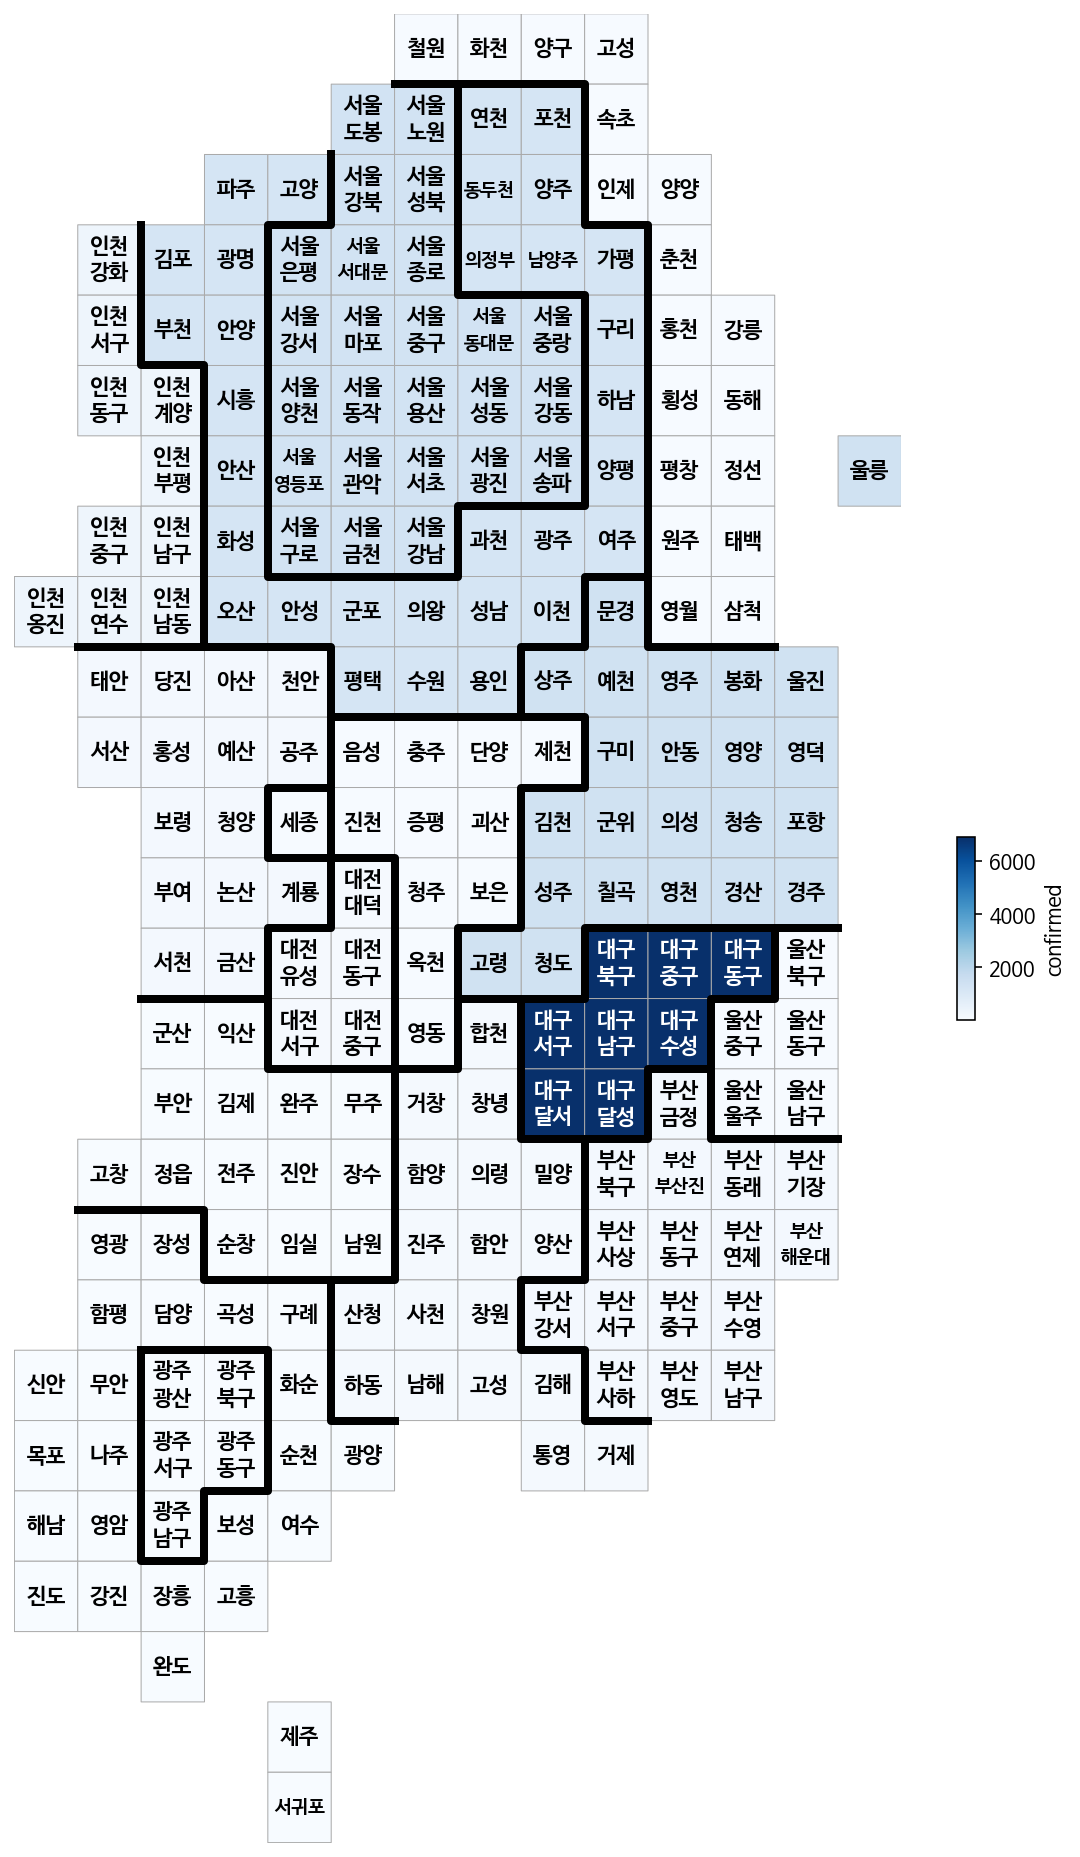

In [7]:
drawKorea('인구수', data_draw_korea, '광역시도', '행정구역', 'Blues','confirmed')

**6월 30일 기준 지역(시,도)별 회복자**

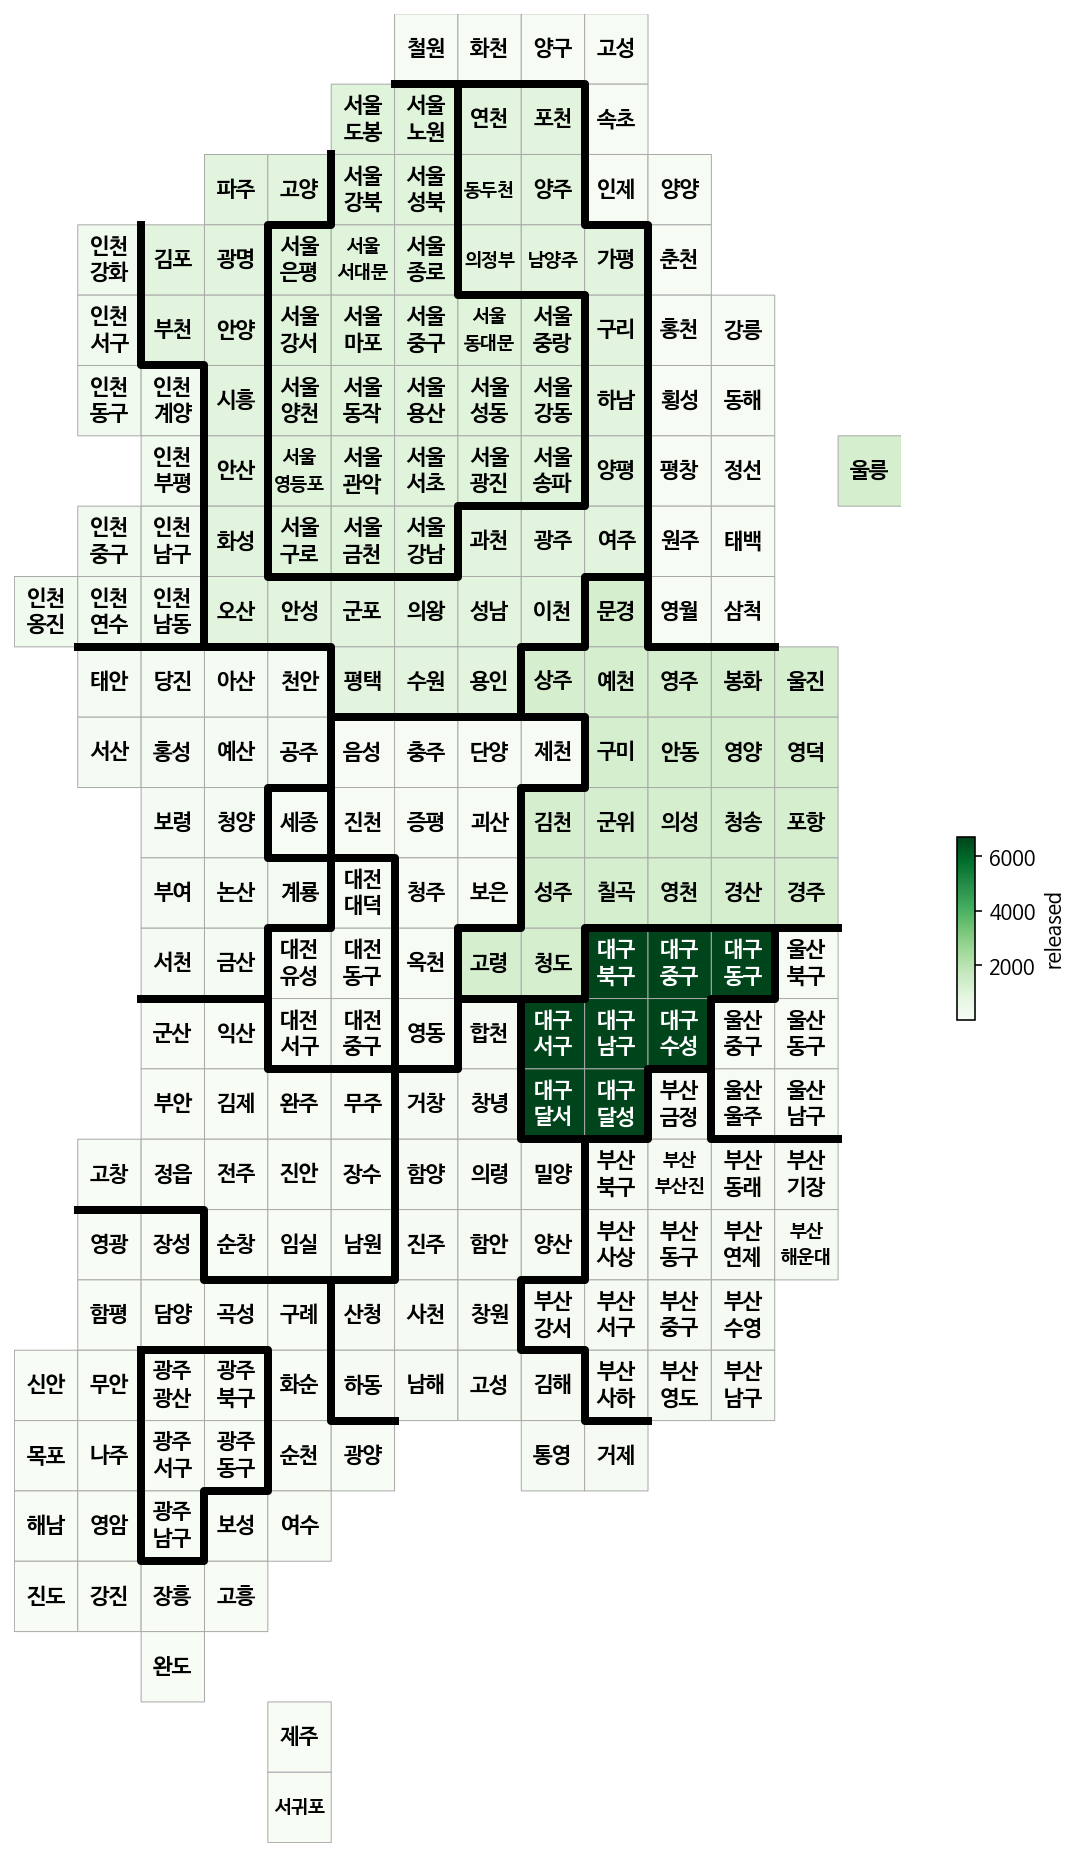

In [8]:
drawKorea('인구수', data_draw_korea, '광역시도', '행정구역', 'Greens','released')

**6월 30일 기준 지역(시,도)별 사망자**

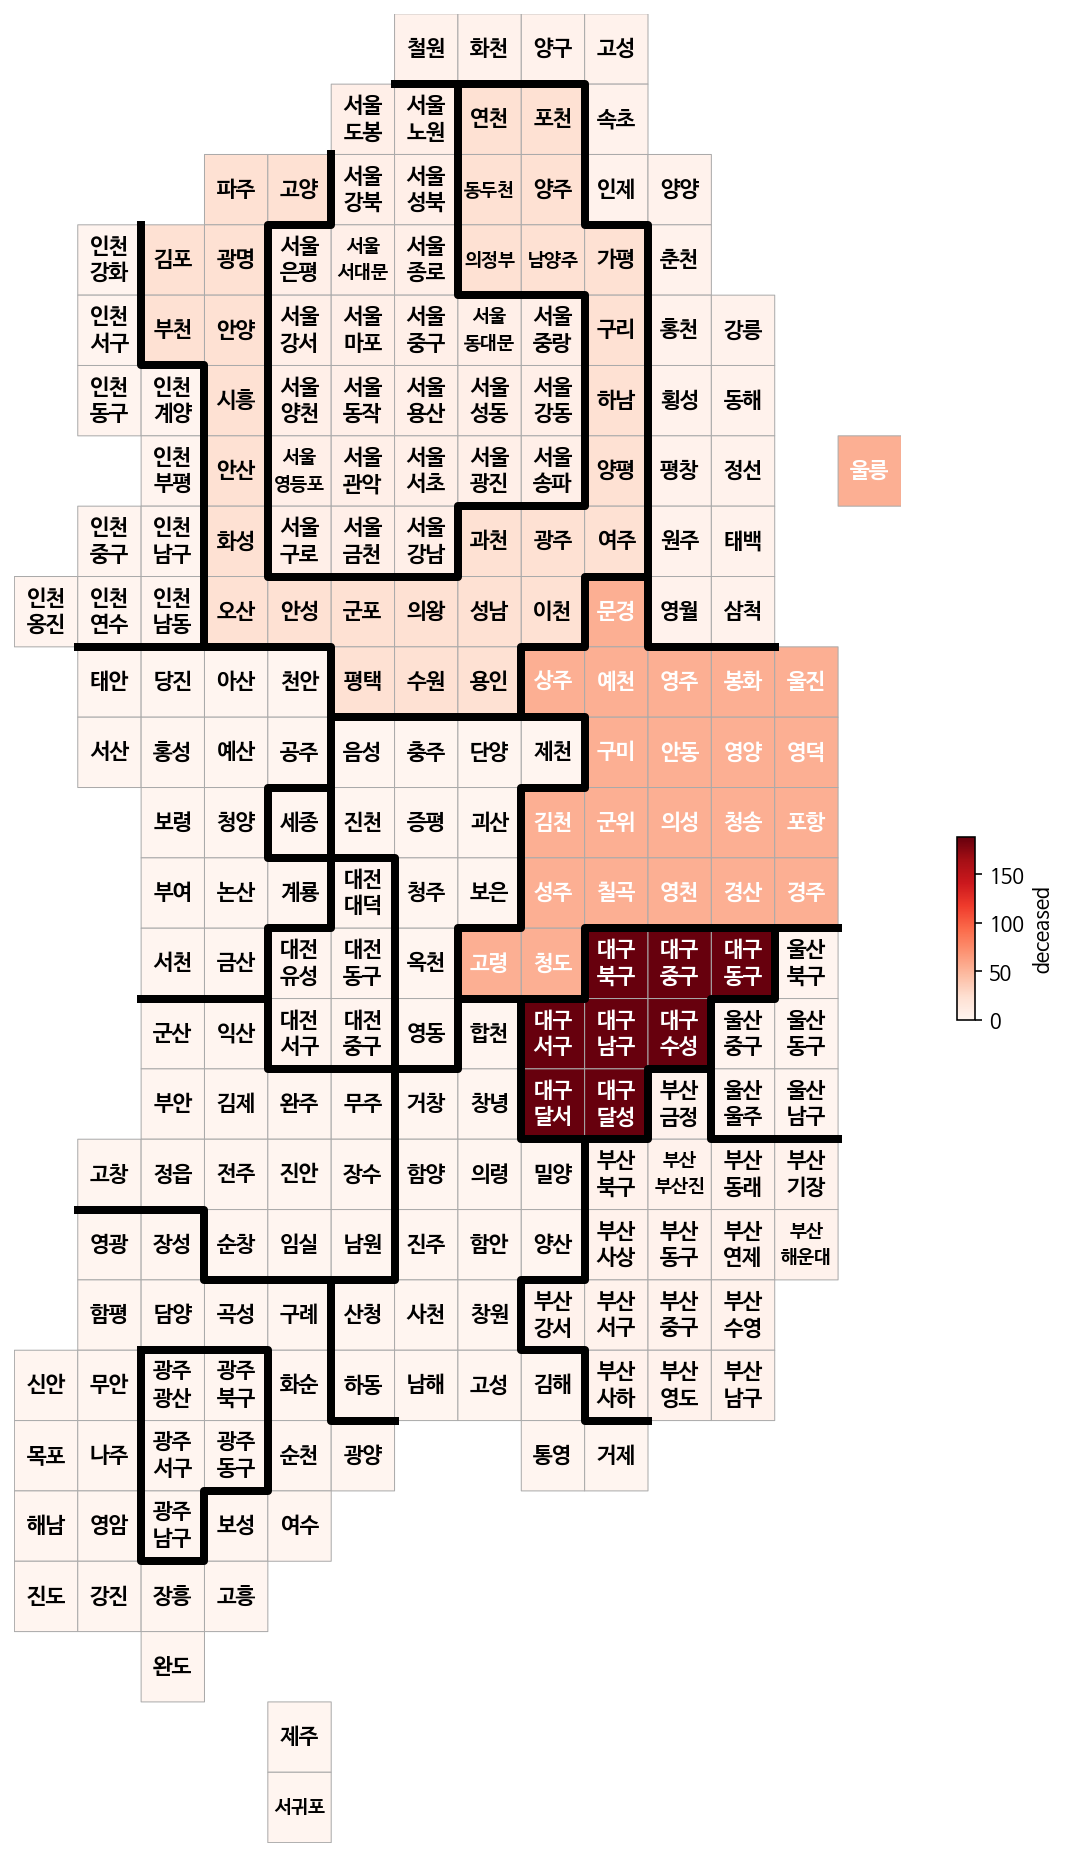

In [ ]:
drawKorea('인구수', data_draw_korea, '광역시도', '행정구역', 'Reds','deceased')

In [10]:
medical_list = [ ("Seoul",23025),("Busan",6827),("Daegu",5128),("Incheon",4536),("Gwangju",2883),("Daejeon",3033),("Ulsan",1817),
("Sejong",524),
("Gyeonggi-do",20875),
("Gangwon-do",2554),
("Chungcheongbuk-do",2792),
("Chungcheongnam-do",3674),
("Jeollabuk-do",3793),
("Jeollanam-do",3405),
("Gyeongsangbuk-do",4493),
("Gyeongsangnam-do",5420),
("Jeju-do",1254)]
#의료기관 수 데이터
df_medical=pd.DataFrame(medical_list,columns=['province','Count_medical'])

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
#의료기관 수 별 지도 그래프를 위한 함수입니다.
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

f_path = "/content/NanumBarunGothic.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

def drawKorea(targetData, blockedMap, d1, d2, cmapname, what):
    gamma = 0.75
    data_draw_korea.loc[(data_draw_korea['광역시도']=='부산광역시'),'인구수']=int(df_medical.loc[(df_medical['province']=='Busan'),what])
    data_draw_korea.loc[(data_draw_korea['광역시도']=='서울특별시'),'인구수']=int(df_medical.loc[(df_medical['province']=='Seoul'),what])
    data_draw_korea.loc[(data_draw_korea['광역시도']=='경기도'),'인구수']=int(df_medical.loc[(df_medical['province']=='Gyeonggi-do'),what])
    data_draw_korea.loc[(data_draw_korea['광역시도']=='경상북도'),'인구수']=int(df_medical.loc[(df_medical['province']=='Gyeongsangbuk-do'),what])
    data_draw_korea.loc[(data_draw_korea['광역시도']=='전라남도'),'인구수']=int(df_medical.loc[(df_medical['province']=='Jeollanam-do'),what])
    data_draw_korea.loc[(data_draw_korea['광역시도']=='강원도'),'인구수']=int(df_medical.loc[(df_medical['province']=='Gangwon-do'),what])
    data_draw_korea.loc[(data_draw_korea['광역시도']=='경상남도'),'인구수']=int(df_medical.loc[(df_medical['province']=='Gyeongsangnam-do'),what])
    data_draw_korea.loc[(data_draw_korea['광역시도']=='충청남도'),'인구수']=int(df_medical.loc[(df_medical['province']=='Chungcheongnam-do'),what])
    data_draw_korea.loc[(data_draw_korea['광역시도']=='전라북도'),'인구수']=int(df_medical.loc[(df_medical['province']=='Jeollabuk-do'),what])
    data_draw_korea.loc[(data_draw_korea['광역시도']=='충청북도'),'인구수']=int(df_medical.loc[(df_medical['province']=='Chungcheongbuk-do'),what])
    data_draw_korea.loc[(data_draw_korea['광역시도']=='인천광역시'),'인구수']=int(df_medical.loc[(df_medical['province']=='Incheon'),what])
    data_draw_korea.loc[(data_draw_korea['광역시도']=='대구광역시'),'인구수']=int(df_medical.loc[(df_medical['province']=='Daegu'),what])
    data_draw_korea.loc[(data_draw_korea['광역시도']=='광주광역시'),'인구수']=int(df_medical.loc[(df_medical['province']=='Gwangju'),what])
    data_draw_korea.loc[(data_draw_korea['광역시도']=='대전광역시'),'인구수']=int(df_medical.loc[(df_medical['province']=='Daejeon'),what])
    data_draw_korea.loc[(data_draw_korea['광역시도']=='울산광역시'),'인구수']=int(df_medical.loc[(df_medical['province']=='Ulsan'),what])
    data_draw_korea.loc[(data_draw_korea['광역시도']=='제주특별자치도'),'인구수']=int(df_medical.loc[(df_medical['province']=='Jeju-do'),what])
    data_draw_korea.loc[(data_draw_korea['광역시도']=='세종특별자치시'),'인구수']=int(df_medical.loc[(df_medical['province']=='Sejong'),what])

    whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData])) * 0.25 + min(blockedMap[targetData])

    datalabel = what

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    BORDER_LINES = [
        [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
        [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
        [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
         (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
        [(9, 12), (9, 10), (8, 10)], # 강원도
        [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
         (13, 4), (14, 4), (14, 2)], # 충청남도
        [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
         (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
        [(14, 4), (15, 4), (15, 6)], # 대전시
        [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
        [(14, 8), (16, 8), (16, 10), (15, 10),
         (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
        [(15, 11), (16, 11), (16, 13)], # 울산시
        [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
        [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
        [(18, 5), (20, 5), (20, 6)], # 전라남도
        [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], # 부산시
    ]

    mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(8, 13))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'

        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. (중구, 서구)
        if row[d1].endswith('시') and not row[d1].startswith('세종'):
            dispname = '{}\n{}'.format(row[d1][:2], row[d2][:-1])
            if len(row[d2]) <= 2:
                dispname += row[d2][-1]
        else:
            dispname = row[d2][:-1]

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 9.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2

        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)
    
        
    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=4)

    plt.gca().invert_yaxis()
    #plt.gca().set_aspect(1)

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

**2020.2분기 지역(시,도)기준 의료 기관 수**

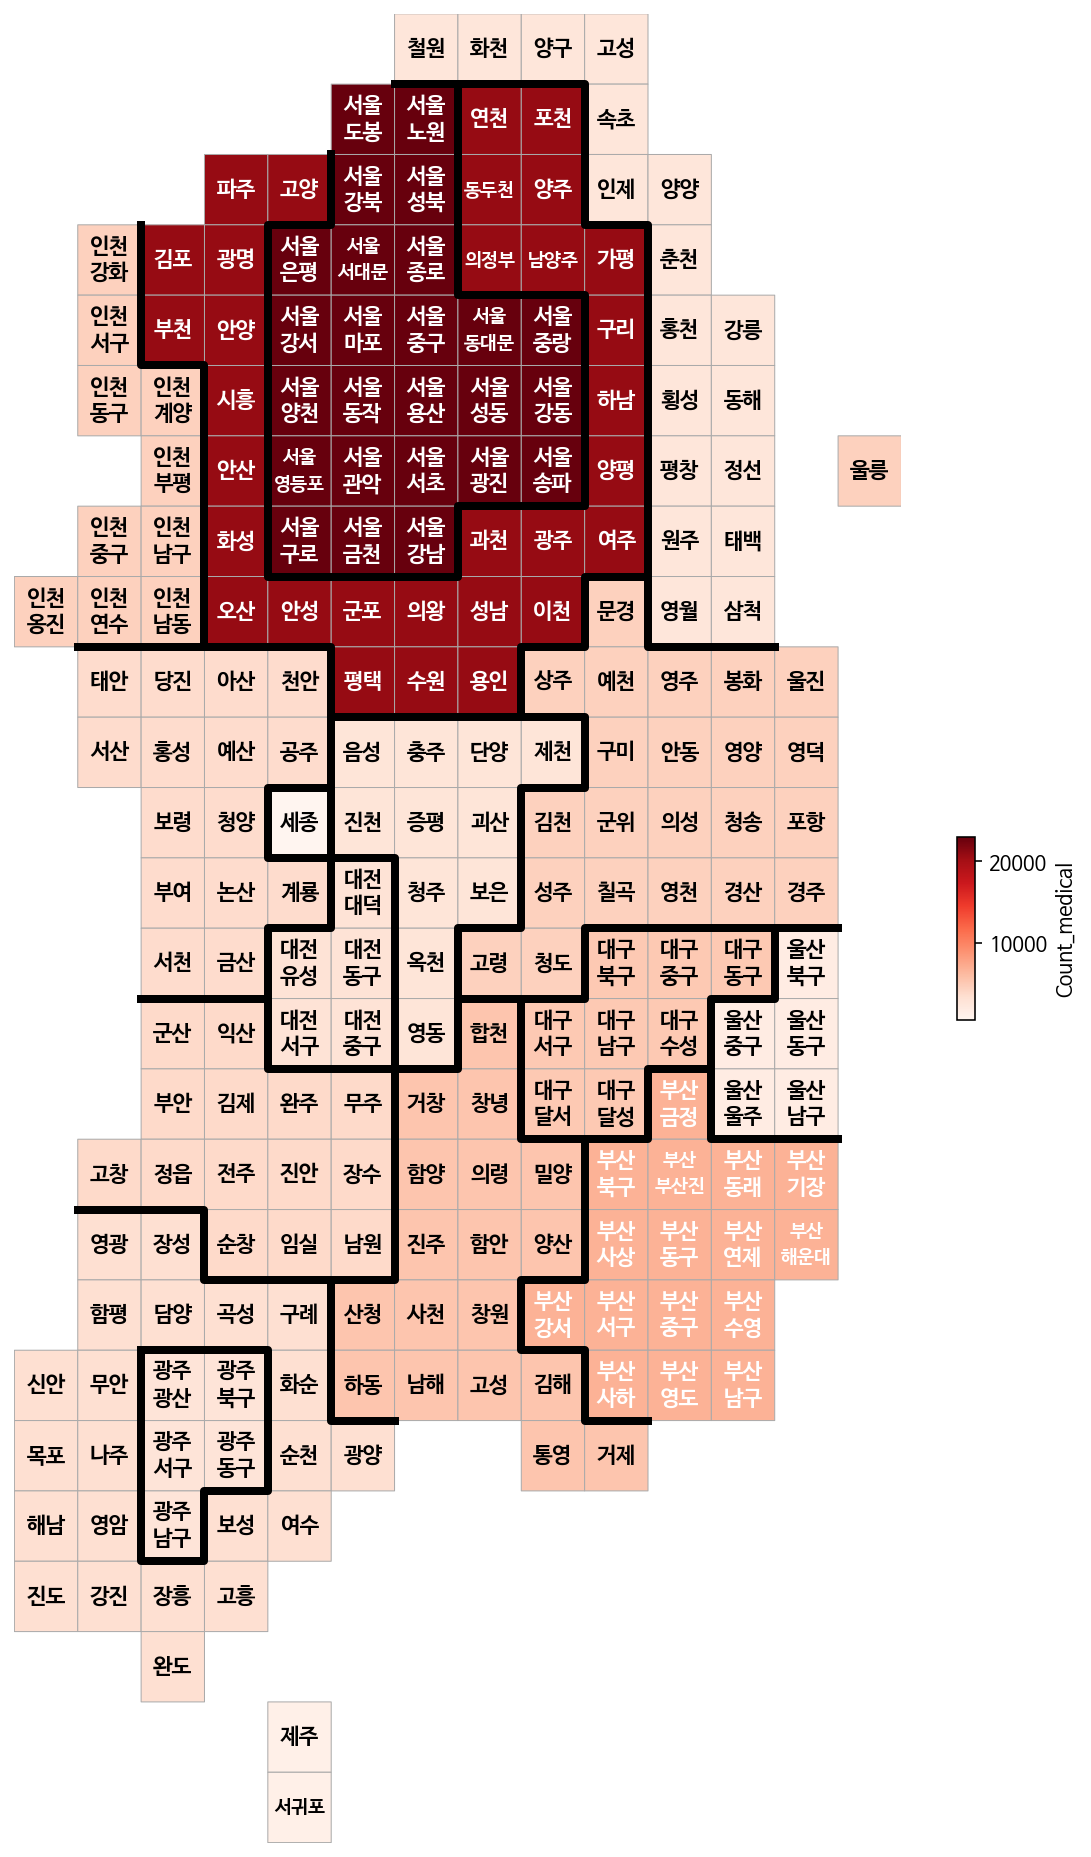

In [ ]:
drawKorea('인구수', data_draw_korea, '광역시도', '행정구역', 'Reds','Count_medical')

위 지도들을 봤을 때, 지역별 사망자, 회복자, 감염자 1순위는 대구와 경북이고 의료기관수는 서울, 경기 순으로 보입니다.

**0-3. 지역별 누적 확진자 그래프**

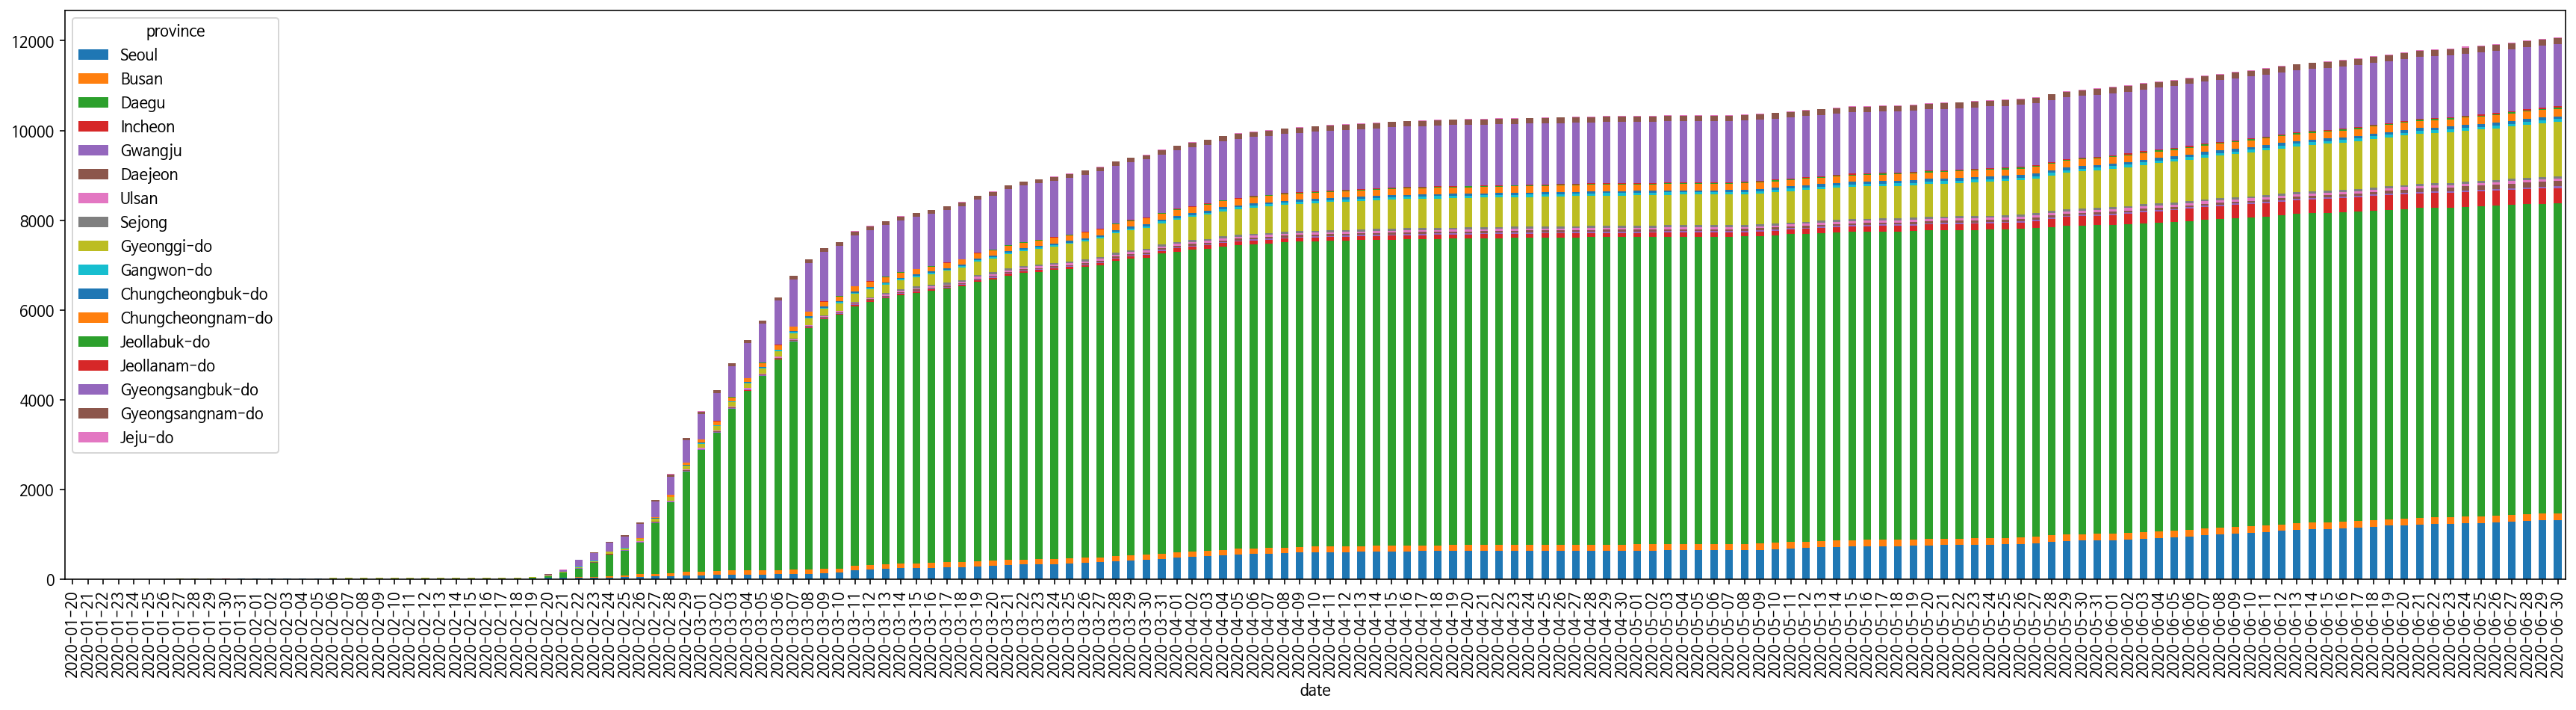

In [19]:
province_list=['Seoul','Busan','Daegu','Incheon','Gwangju','Daejeon','Ulsan','Sejong','Gyeonggi-do','Gangwon-do','Chungcheongbuk-do','Chungcheongnam-do',
'Jeollabuk-do',
'Jeollanam-do',
'Gyeongsangbuk-do',
'Gyeongsangnam-do',
'Jeju-do']

#데이터 피봇하기
pivot_df = df.pivot(index='date', columns='province', values='confirmed')
pivot_df = pivot_df[province_list].copy()
pivot_df.plot.bar(stacked=True, figsize=(30,7))


2020.02.28부터 대구와 경상북도의 확진자 수 증가 폭이 매우 큰 것을 확인할 수 있습니다.

앞으로 왜 이런 현상이 띄게 되었는지 보고자 합니다.

**0-4.지역별 회복자 그래프**

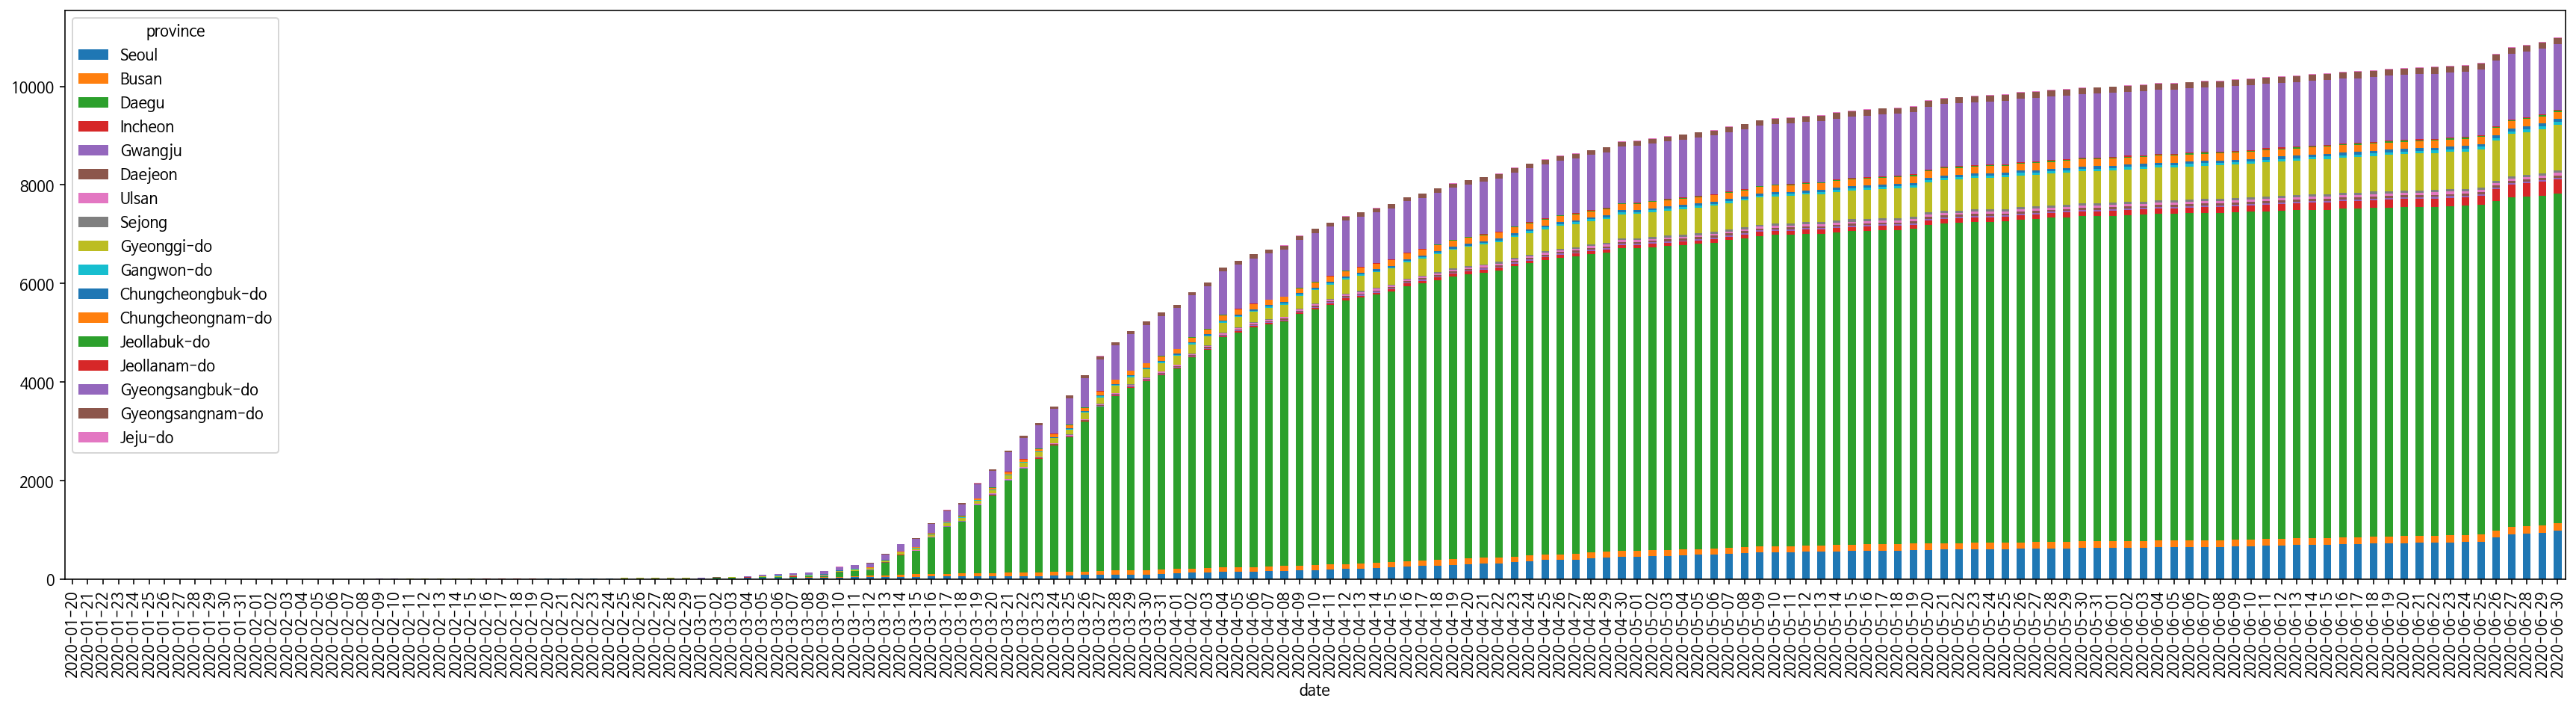

In [20]:
pivot_df = df.pivot(index='date', columns='province', values='released')
pivot_df = pivot_df[province_list].copy()
pivot_df.plot.bar(stacked=True, figsize=(30,7))

대구와 경북의 확진자 추세와 회복자 추세가 유사한 형태를 띄고 회복자 추세는 2020.03.15일 쯤에 증가 폭이 늘어남을 알 수 있습니다.

# 1. 대구, 경북의 확진자 수 추세가 큰 것을 볼 수 있는데 이러한 이유와 다른 지역도 이런 양상이 있는가?

전반적인 눈에 띄는 추세를 캐치하고 지역끼리 유사한 추세를 띄는 부분이 있는지 살펴보고자 합니다.

**1-1. 대구와 경상북도 확진자, 사망자, 회복자 추이**

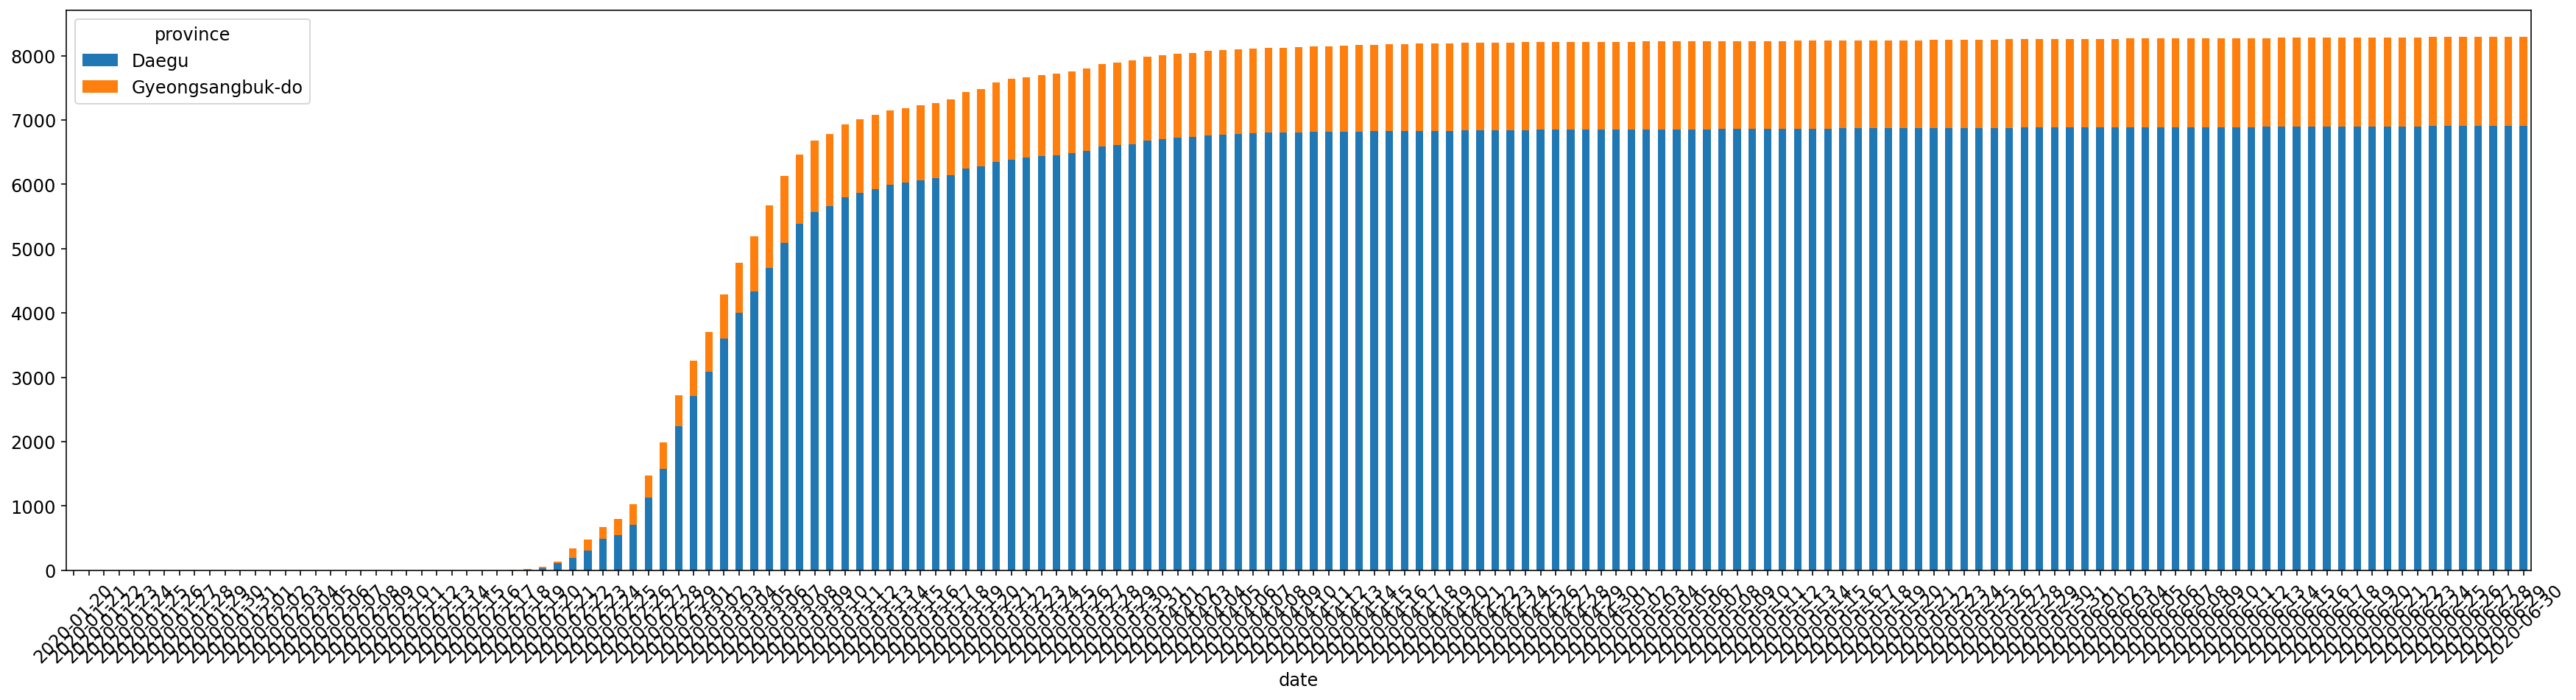

In [74]:
df1=df.loc[(df['province'] == 'Daegu')|(df['province'] == 'Gyeongsangbuk-do')]
pivot_df = df1.pivot(index='date', columns='province', values='confirmed')
pivot_df = pivot_df[['Daegu','Gyeongsangbuk-do']].copy()
pivot_df.plot.bar(stacked=True, figsize=(30,7))
plt.xticks(rotation=45)
plt.show()

2020.02.22부터 대구의 확진자는 크게 늘어나는 것을 확인 가능하다.

**1-2. 서울과 경기, 인천 확진자 추이 그래프**

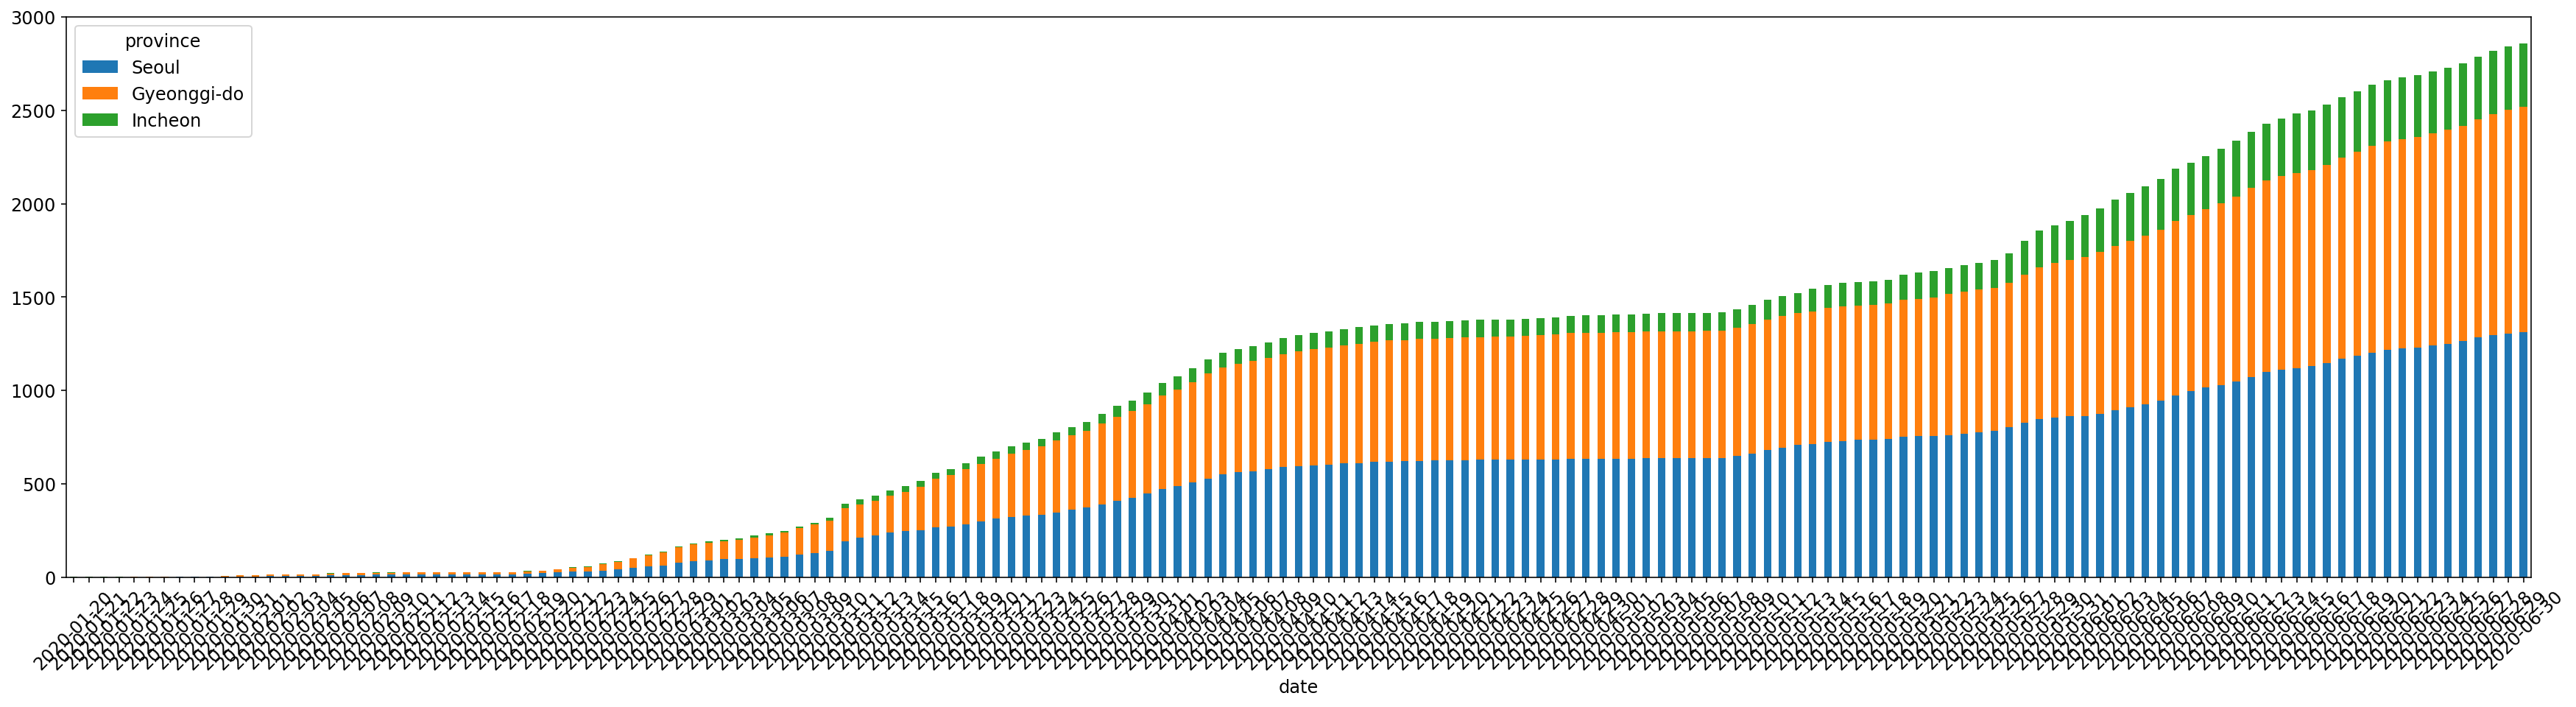

In [79]:
df1=df.loc[(df['province'] == 'Seoul')|(df['province'] == 'Gyeonggi-do')|(df['province'] == 'Incheon')]
pivot_df = df1.pivot(index='date', columns='province', values='confirmed')
pivot_df = pivot_df[['Seoul','Gyeonggi-do','Incheon']].copy()
pivot_df.plot.bar(stacked=True, figsize=(30,7))
plt.xticks(rotation=45)
plt.show()

서울,경기는 대구,경북만큼은 아니지만 3.15-4.3과 5.26-6.30에서 확진자의 증가 폭이 늘어나는 것을 확인할 수 있습니다.

인천 또한 서울과 경기 확진자 증가폭 추세랑 유사하지만 증가 폭이 두 지역보다 작습니다.

**1-3. 대전 확진자 추이 그래프**

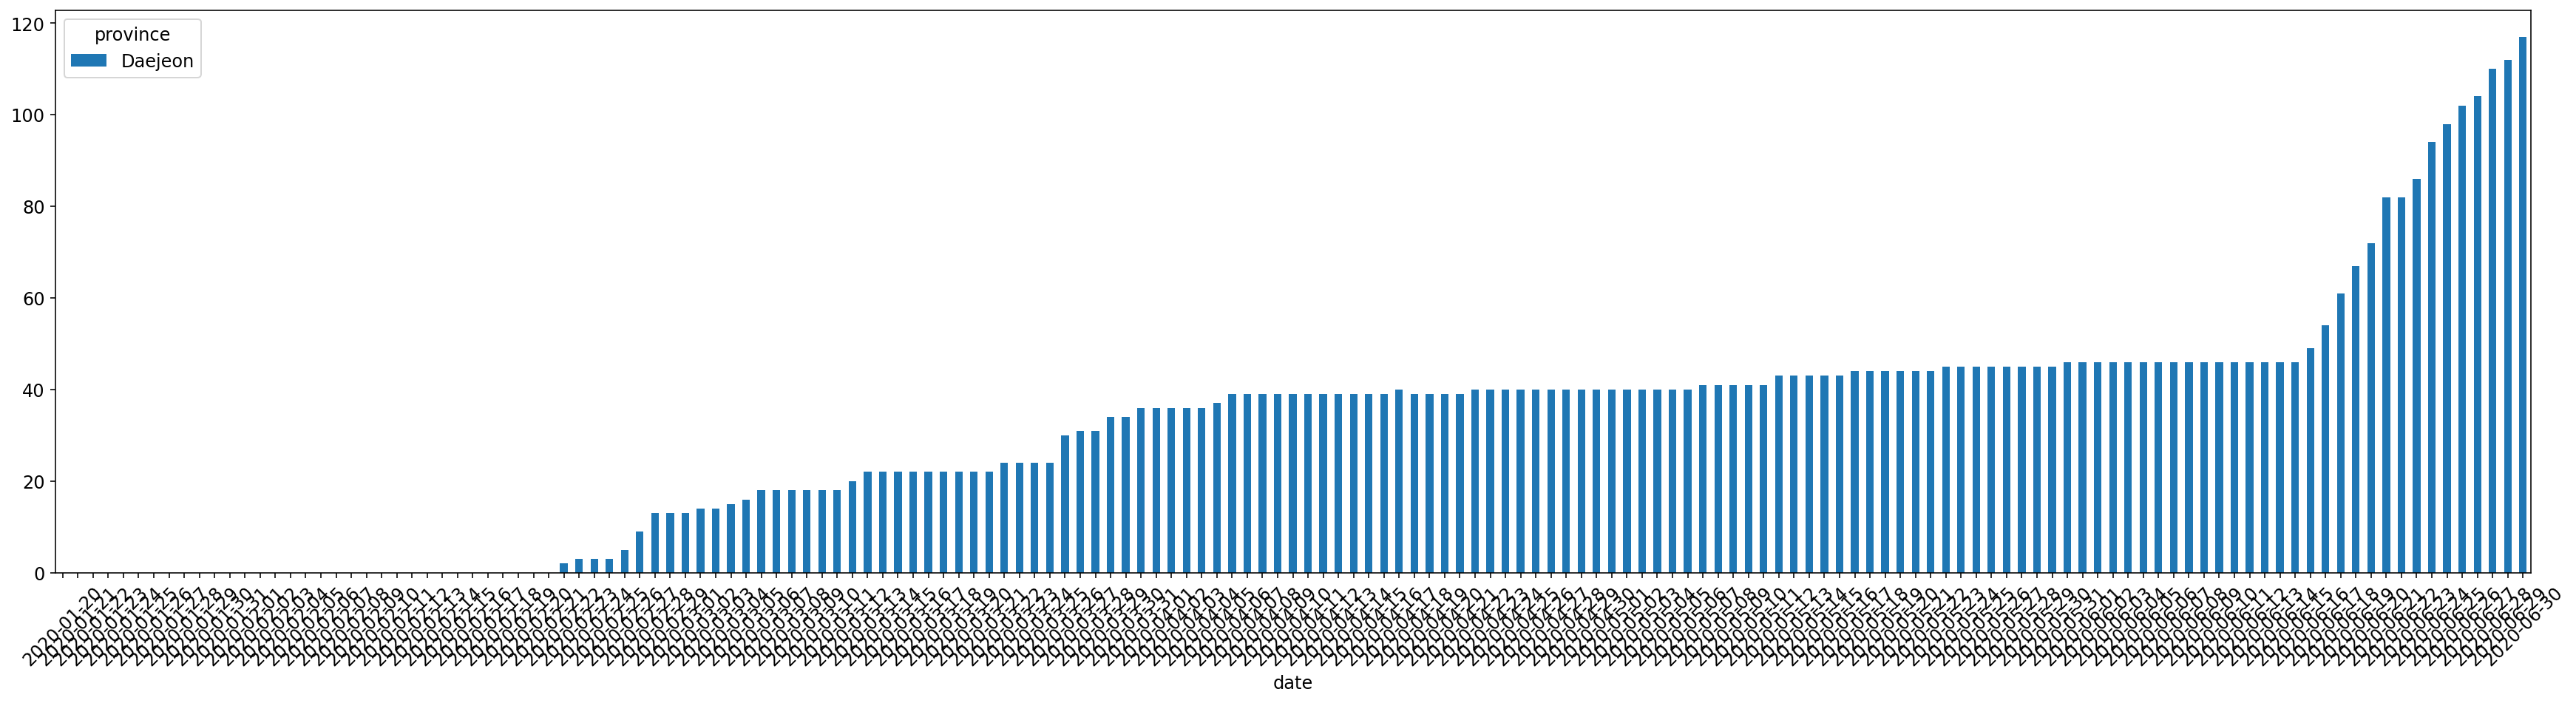

In [81]:
df1=df.loc[(df['province'] == 'Daejeon')]
pivot_df = df1.pivot(index='date', columns='province', values='confirmed')
pivot_df = pivot_df[['Daejeon']].copy()
pivot_df.plot.bar(stacked=True, figsize=(30,7))
plt.xticks(rotation=45)
plt.show()

대전은 6.14부터 급증하는 것을 볼 수 있습니다.

**1.4 의료 기관 수**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

<Figure size 3600x576 with 0 Axes>

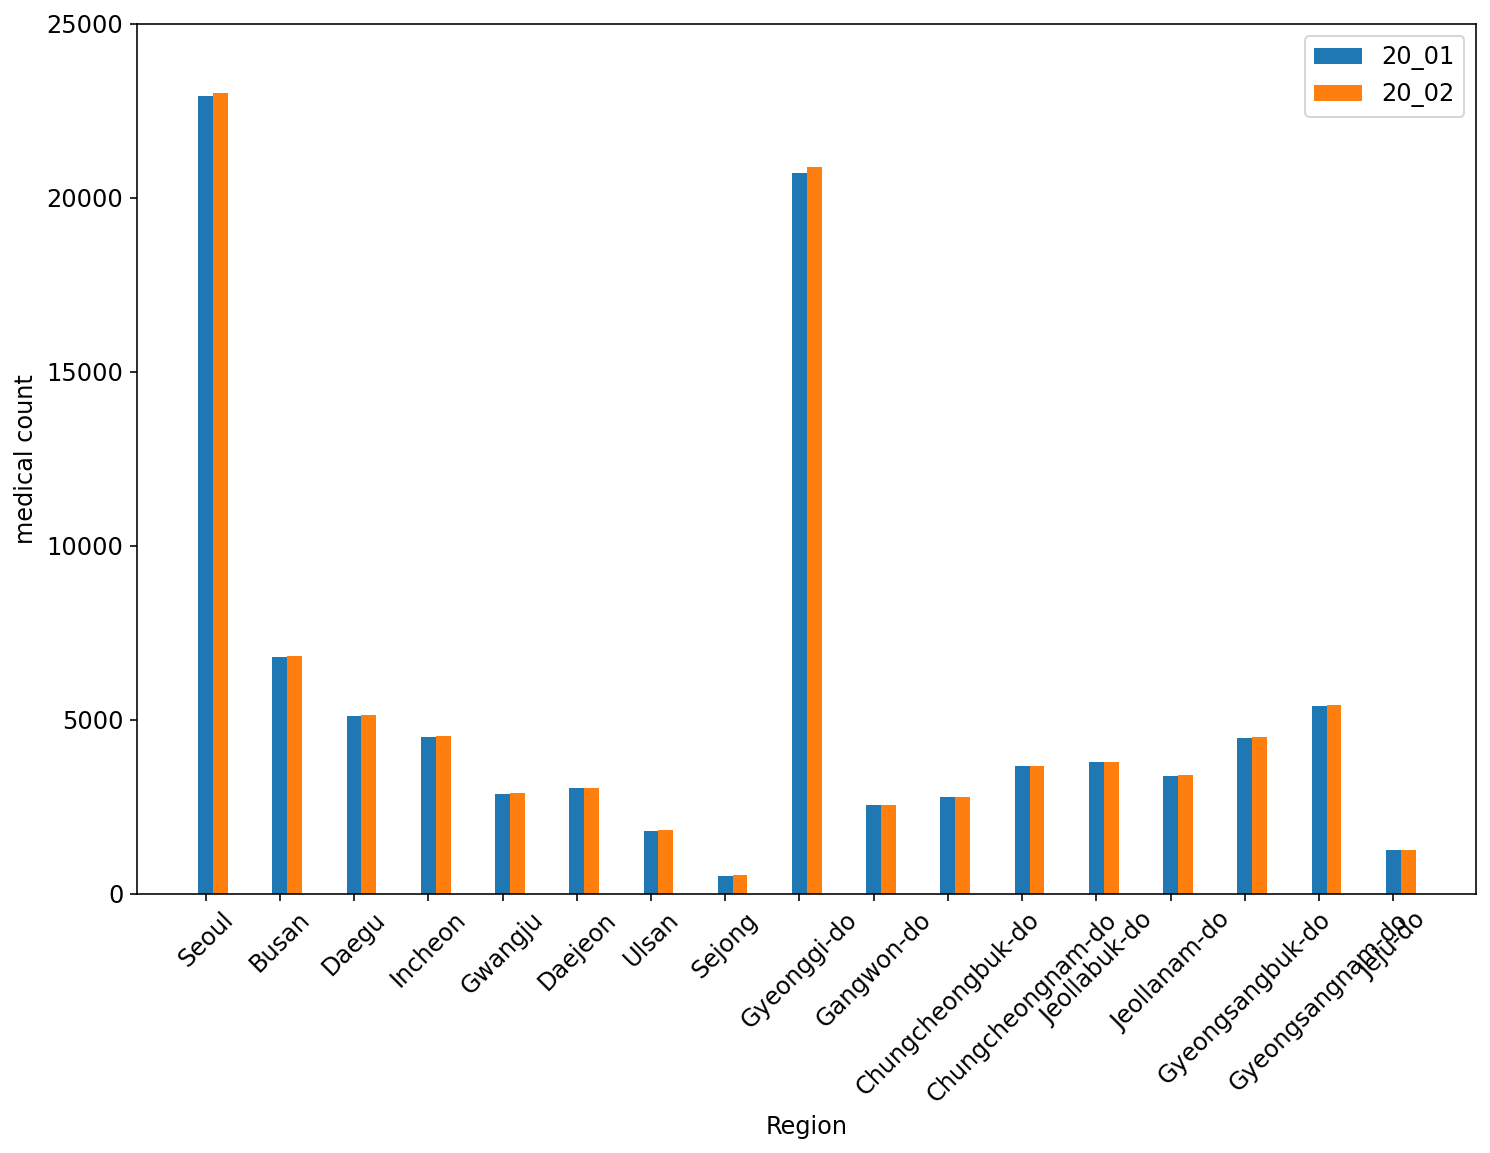

In [87]:
from matplotlib import pyplot
import numpy
fig = plt.figure(figsize=(50, 8))
label=list(total_medical["province"])

pyplot.rcParams["font.family"]='Malgun Gothic'
pyplot.rcParams["font.size"]=12
pyplot.rcParams["figure.figsize"]=(12,8)

pyplot.figure()

x=numpy.arange(len(label))

pyplot.bar(x-0.0,total_medical['Count_medical20_01'],label='20_01',width=0.2)
pyplot.bar(x+0.2,total_medical['Count_medical20_02'],label='20_02',width=0.2)
pyplot.xticks(x,label)

pyplot.legend()
pyplot.xlabel('Region')
pyplot.ylabel('medical count')
pyplot.ylim(0,25000)
pyplot.xticks(rotation=45)




20년1분기와 20년 2분기의 평균 의료기관 수 차이는 28개로 작습니다.

**1장 끝나며**

여기까지 보며 경북과 대구는 신천지로 인해 크게 확진자가 늘어나고 서울과 경기, 인천은 해외 유입이나 밀집도, 의료시설비율이 좋지 않아서 이러한 추세가 보인다고 예측됩니다.

또한 의료시설수가 1분기와 2분기의 차이가 많이 차이 나지 않아서 크게 영향을 줄 수 있을지가 의문입니다.

# 2. 예측이 맞는지에 대한 확진경로 분석

이러한 확진 추세가 보이는 이유로 신천지, 해외유입, 의료시설비율 등이 예측되는데 맞는지 확인해보자.

In [110]:
PatientInfo['infection_case'].unique()

array(['overseas inflow', 'contact with patient', 'Seongdong-gu APT',
       'etc', "Eunpyeong St. Mary's Hospital", 'Shincheonji Church',
       'Dongan Church', 'Guro-gu Call Center', nan, 'Itaewon Clubs',
       'Samsung Medical Center', 'Biblical Language study meeting',
       'Coupang Logistics Center', 'Guri Collective Infection',
       'KB Life Insurance', 'Gangnam Dongin Church',
       'Korea Campus Crusade of Christ',
       'Yeongdeungpo Learning Institute', 'Yeonana News Class',
       'SMR Newly Planted Churches Group', 'Seocho Family',
       'Anyang Gunpo Pastors Group', 'Richway',
       'Samsung Fire & Marine Insurance', 'Yangcheon Table Tennis Club',
       'Yongin Brothers', 'Day Care Center',
       'Geumcheon-gu rice milling machine manufacture', 'Daezayeon Korea',
       'Orange Life', 'Daejeon door-to-door sales',
       'Seoul City Hall Station safety worker', 'Uiwang Logistics Center',
       'Wangsung Church', 'Gangnam Yeoksam-dong gathering',
       'Onchun

In [111]:
PatientInfo['infection_case'].isnull().sum()
#5165개 중에 919개가 null값이다(많은 비중을 차지합니다.)

919

확산요인이라고 생각되는 주된 요인으로 구로콜센터, 신천지, 해외 유입이 예측이 되어 그대로 사용하고 감염경로 수가 많은 contact with patient도 그대로 사용하기로 했습니다.

또한 의료기관수(의료인프라)와 관련있을 수 있으므로 병원 관련 시설(medical) 아닌 시설(nonmedical)로 나눕니다.

In [112]:
PatientInfo = PatientInfo.fillna('None')
#범주를 etc, contatct with patient, overseas inflow, church, medical, nonmedical, 구로콜센터, 신천지로 나누었다. 
church=['Onchun Church','Dongan Church','River of Grace Community Church','Geochang Church','Pilgrimage to Israel','Gangnam Dongin Church','Korea Campus Crusade of Christ','SMR Newly Planted Churches Group','Wangsung Church']
medical=['Gyeongsan Seorin Nursing Home',"Eunpyeong St. Mary's Hospital",'Bonghwa Pureun Nursing Home','Milal Shelter','Gyeongsan Jeil Silver Town','Cheongdo Daenam Hospital','Gyeongsan Cham Joeun Community Center']
nonmedical=['gym facility in Sejong','gym facility in Cheonan','Suyeong-gu Kindergarten','Ministry of Oceans and Fisheries','Changnyeong Coin Karaoke','Seongdong-gu APT','Itaewon Clubs','Samsung Medical Center', 'Biblical Language study meeting']
etc=['etc']
GuroCallCenter = ['Guro-gu Call Center']
shincheonji = ['Shincheonji Church']
#None은 어떤 것이 있을지 모르므로 그대로 사용합니다.

In [113]:
#범주 나누기
def infection_case_categories(x):
    
    if x in church:
      y = 'church'
    elif x in medical: 
      y = 'medical'
    elif x in GuroCallCenter:
      y='GuroCallCenter'
    elif x in shincheonji:
      y='Shincheonji'
    elif x=='contact with patient':
      y='contact with patient'
    elif x=='overseas inflow':
      y='overseas'
    elif x in etc:
      y='etc'
    elif x=='None':
      y='None'
    else:
      y='nonmedical'
    return y 

PatientInfo['infection'] = PatientInfo['infection_case'].apply(lambda x: infection_case_categories(x))

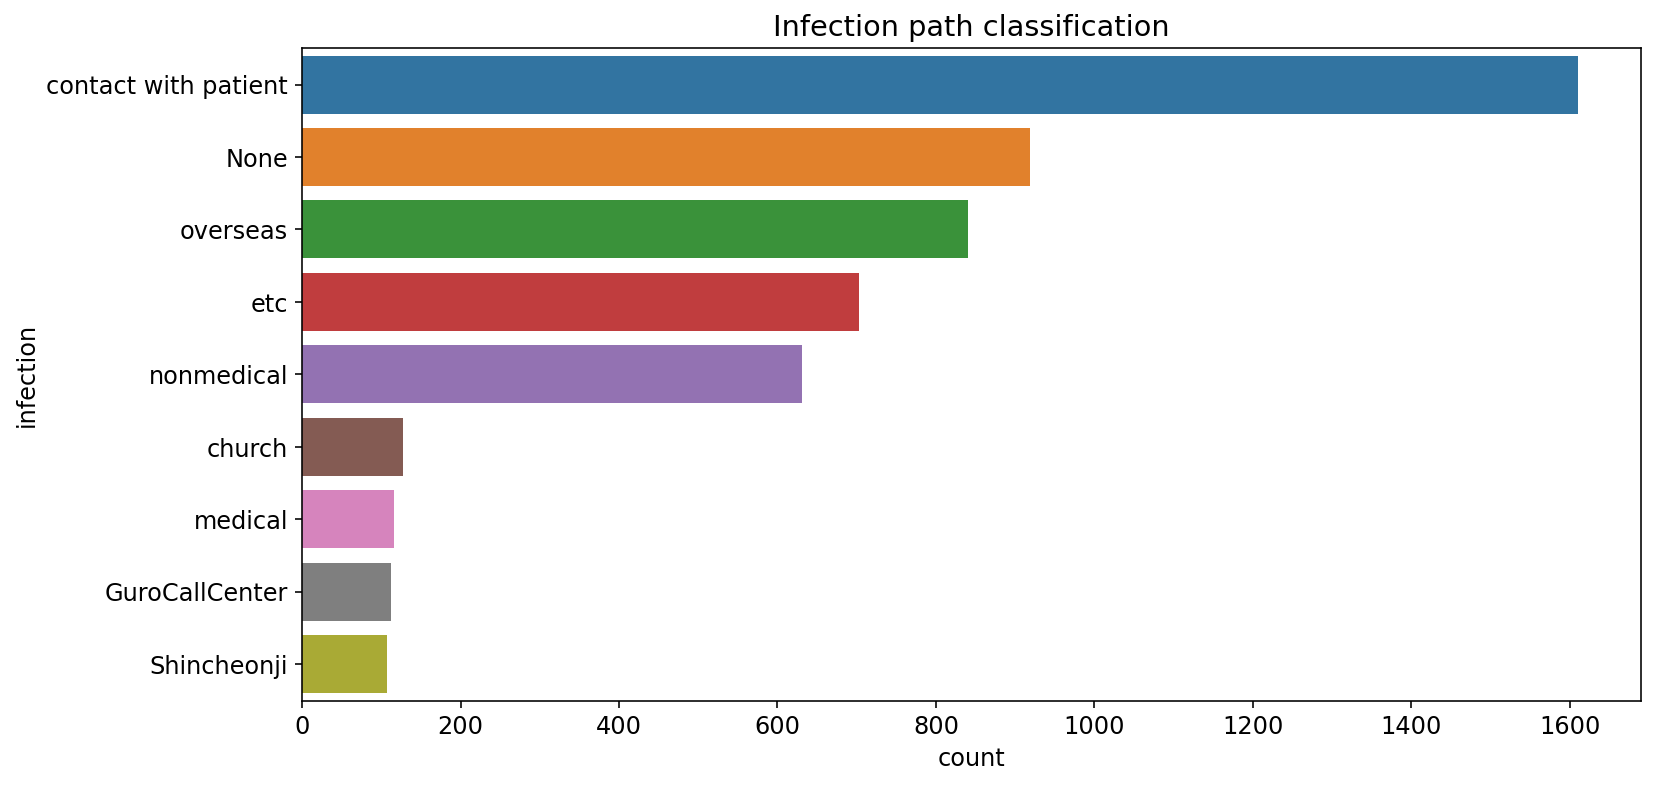

In [114]:
g = PatientInfo.groupby(['infection'])['patient_id'].count()
g = g.reset_index()
g.rename(columns = {'patient_id': 'count'}, inplace = True)

g = g.sort_values('count', ascending = False)

plt.figure(figsize = (12,6))
sns.barplot(y = 'infection', x= 'count', data = g)
plt.title('Infection path classification')
display()

확실히 contact with patient가 압도적으로 많습니다. None은 어떤 감염경로인지는 모르지만 많은 부분을 차지합니다.

In [115]:
PatientInfo['infection'].value_counts()
#총 5165번 중에 116번 차지하므로 medical이 많은 비중을 차지 하지는 않습니다.

contact with patient    1610
None                     919
overseas                 840
etc                      703
nonmedical               631
church                   127
medical                  116
GuroCallCenter           112
Shincheonji              107
Name: infection, dtype: int64

Seoul의 감염경로


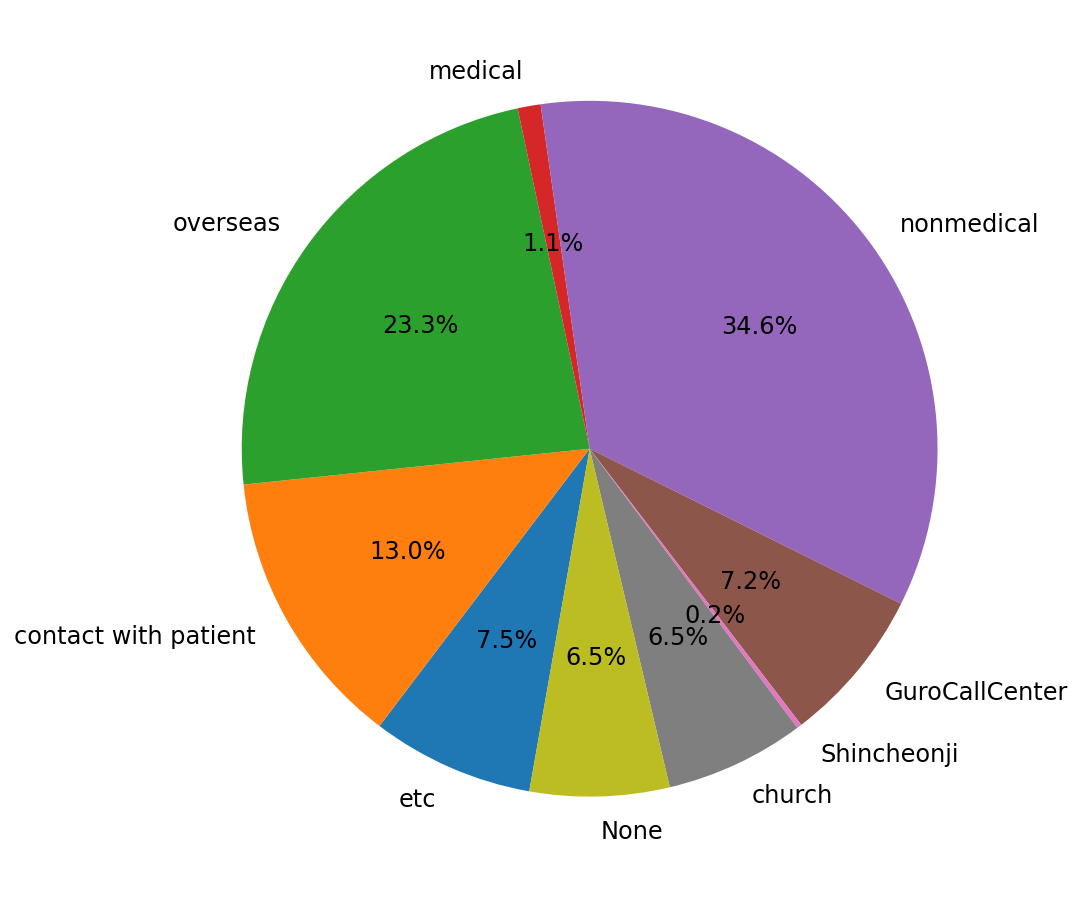

Busan의 감염경로


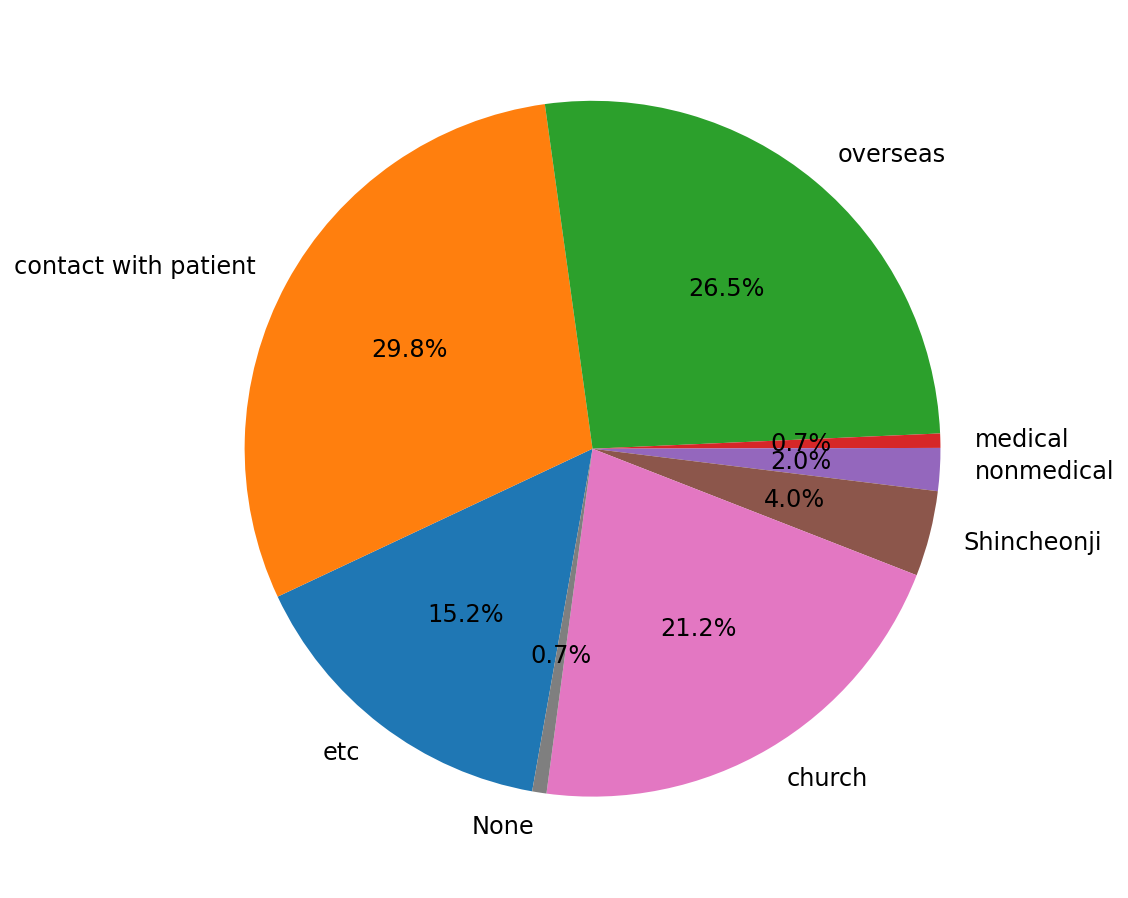

Daegu의 감염경로


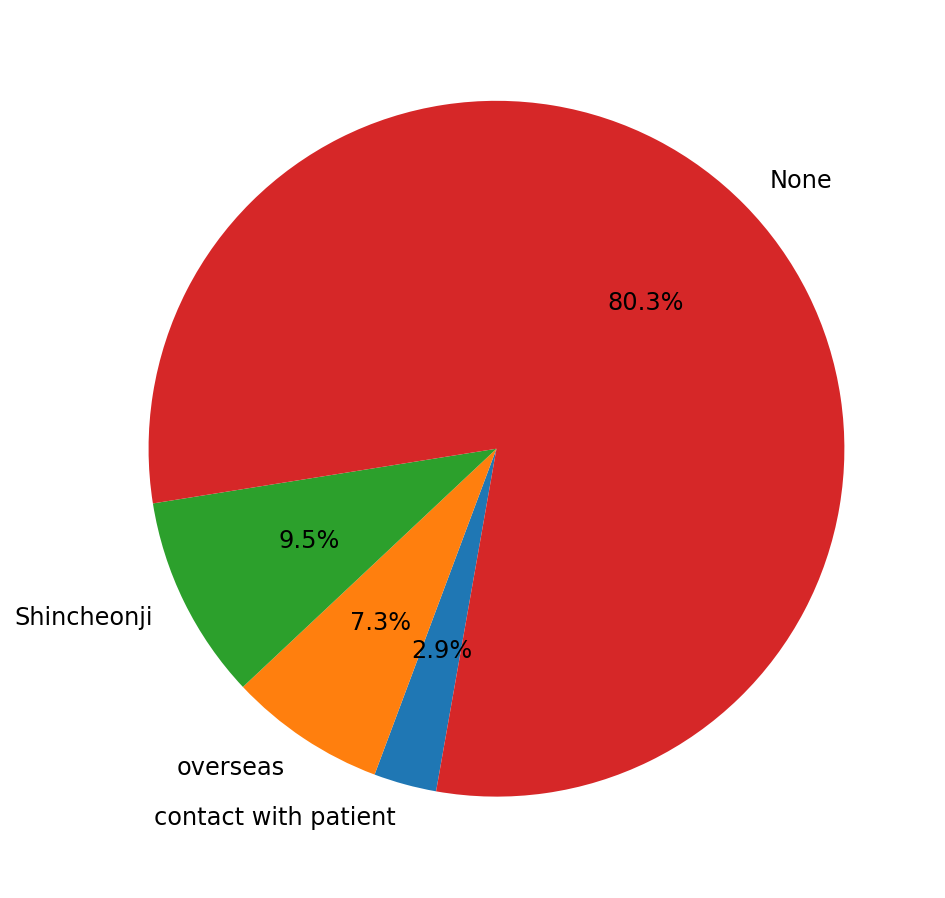

Incheon의 감염경로


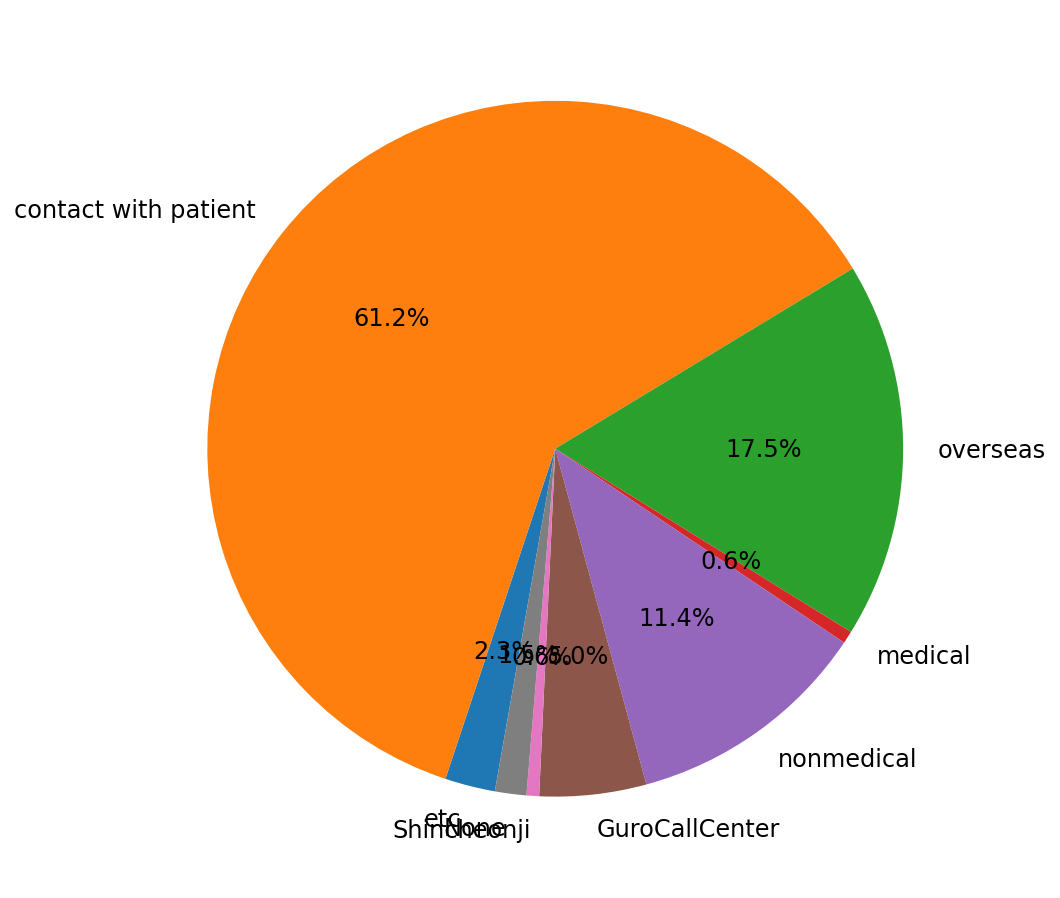

Gwangju의 감염경로


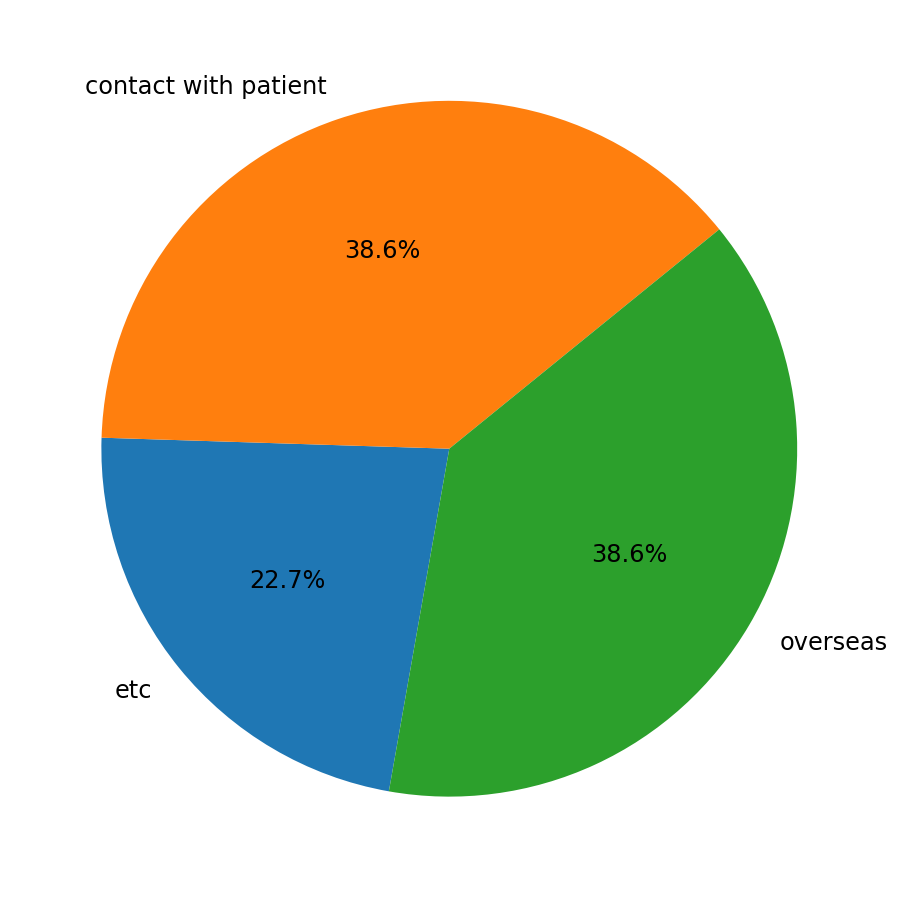

Daejeon의 감염경로


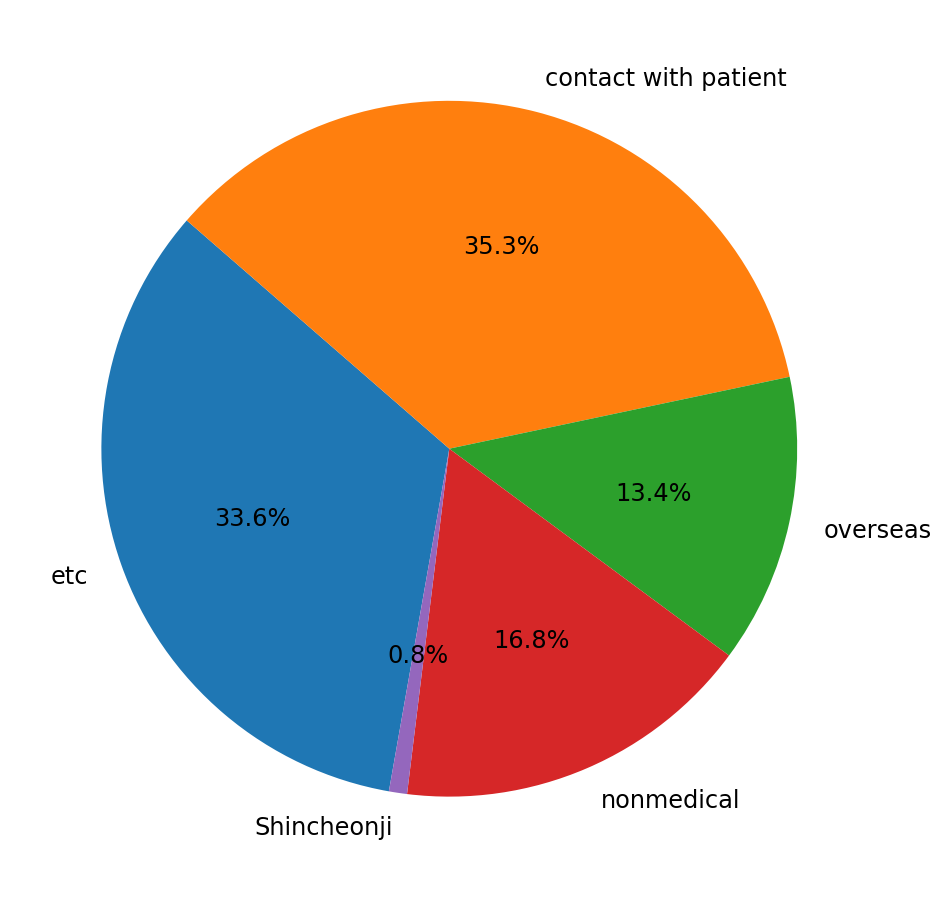

Ulsan의 감염경로


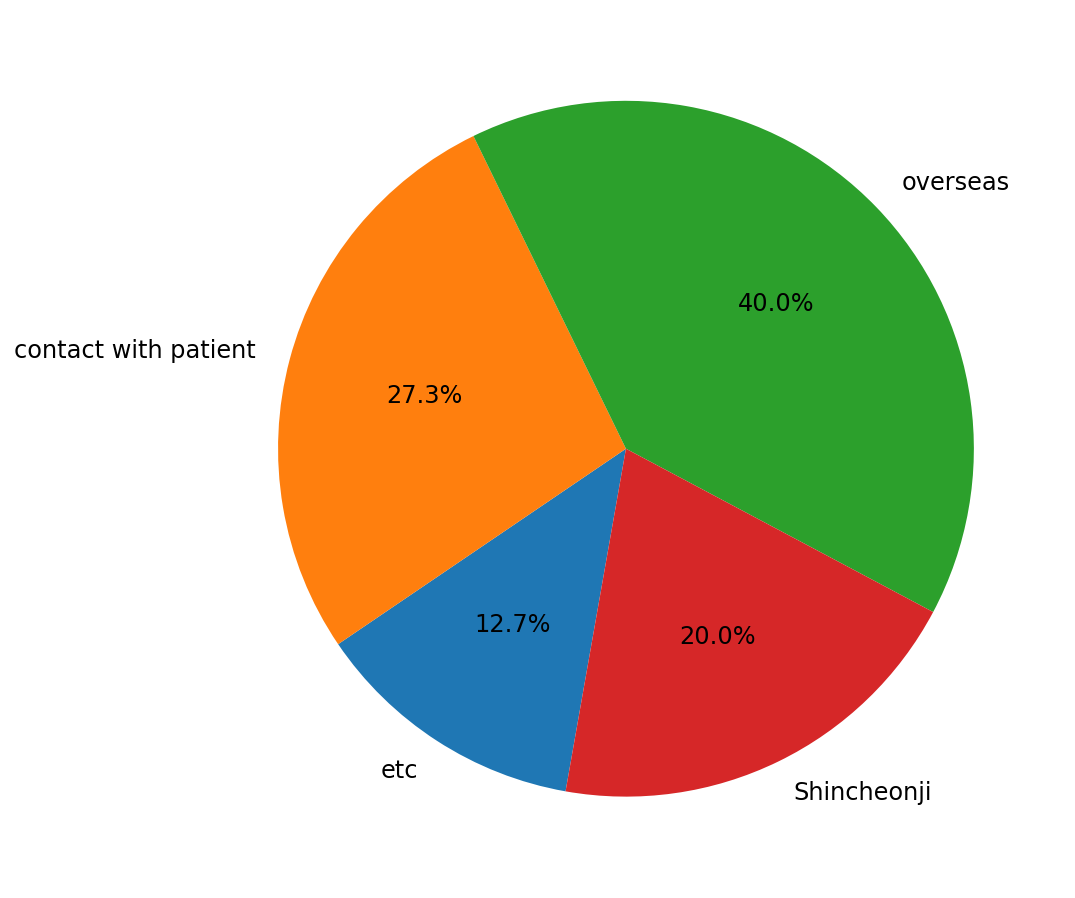

Sejong의 감염경로


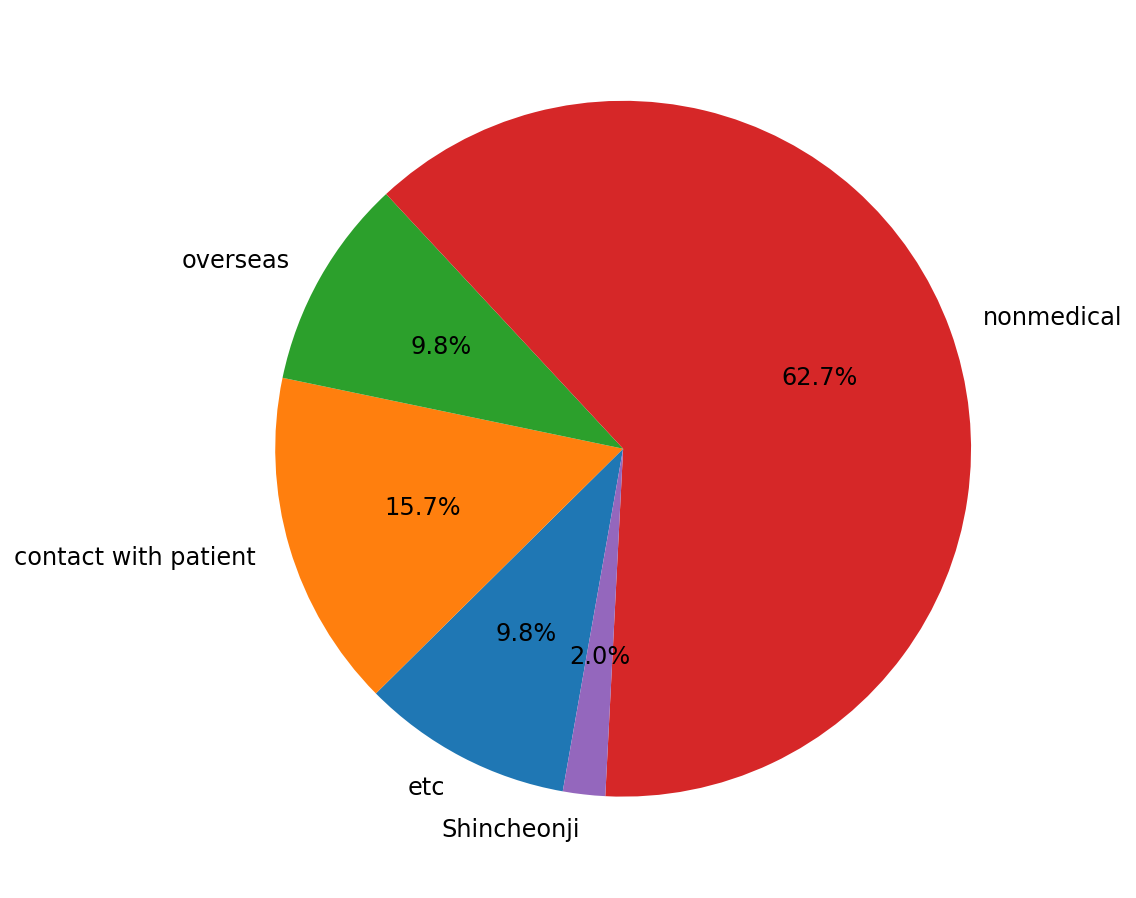

Gyeonggi-do의 감염경로


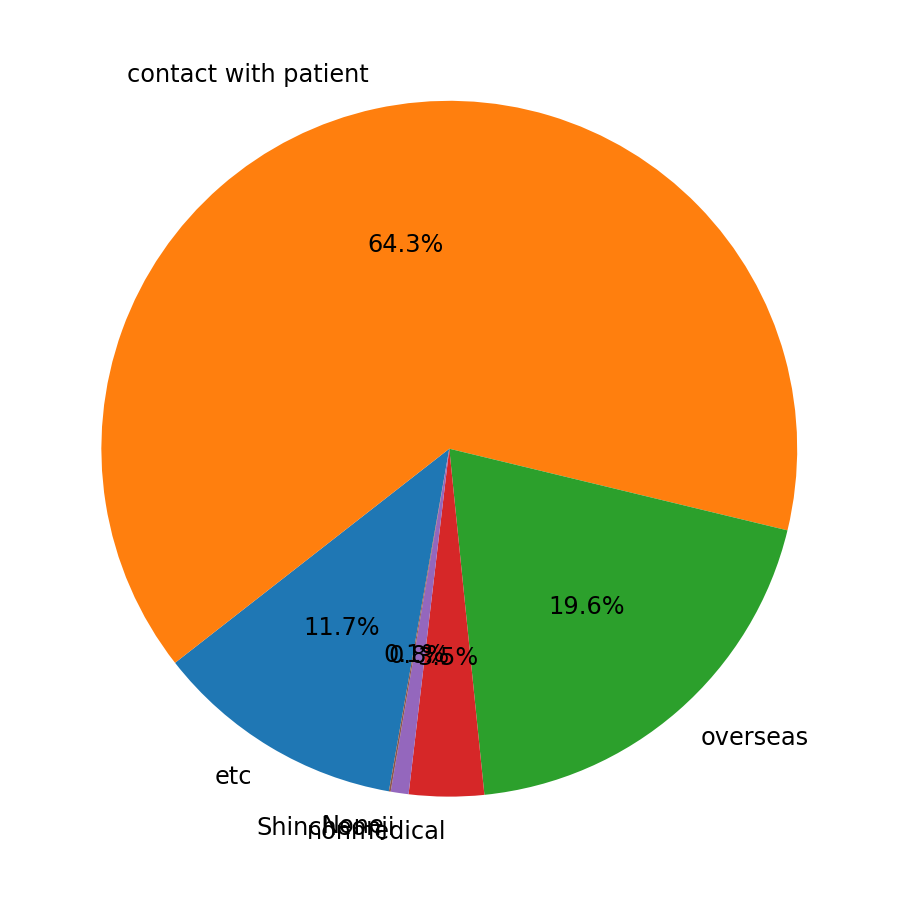

Gangwon-do의 감염경로


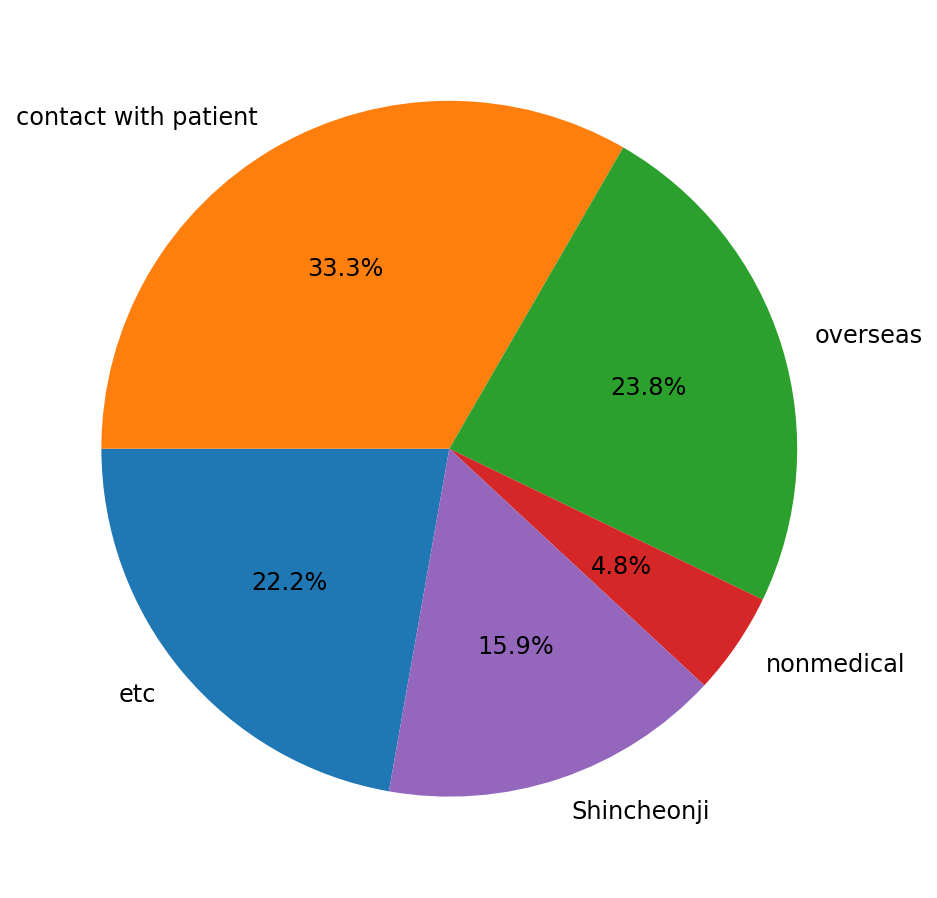

Chungcheongbuk-do의 감염경로


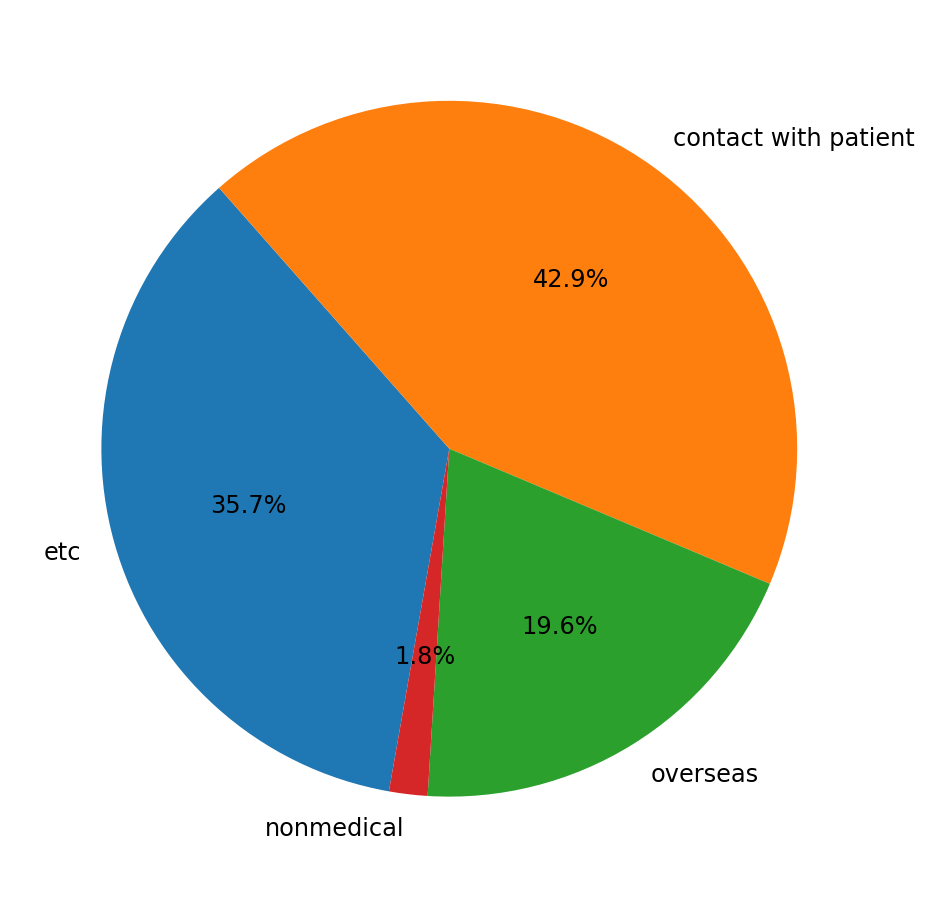

Chungcheongnam-do의 감염경로


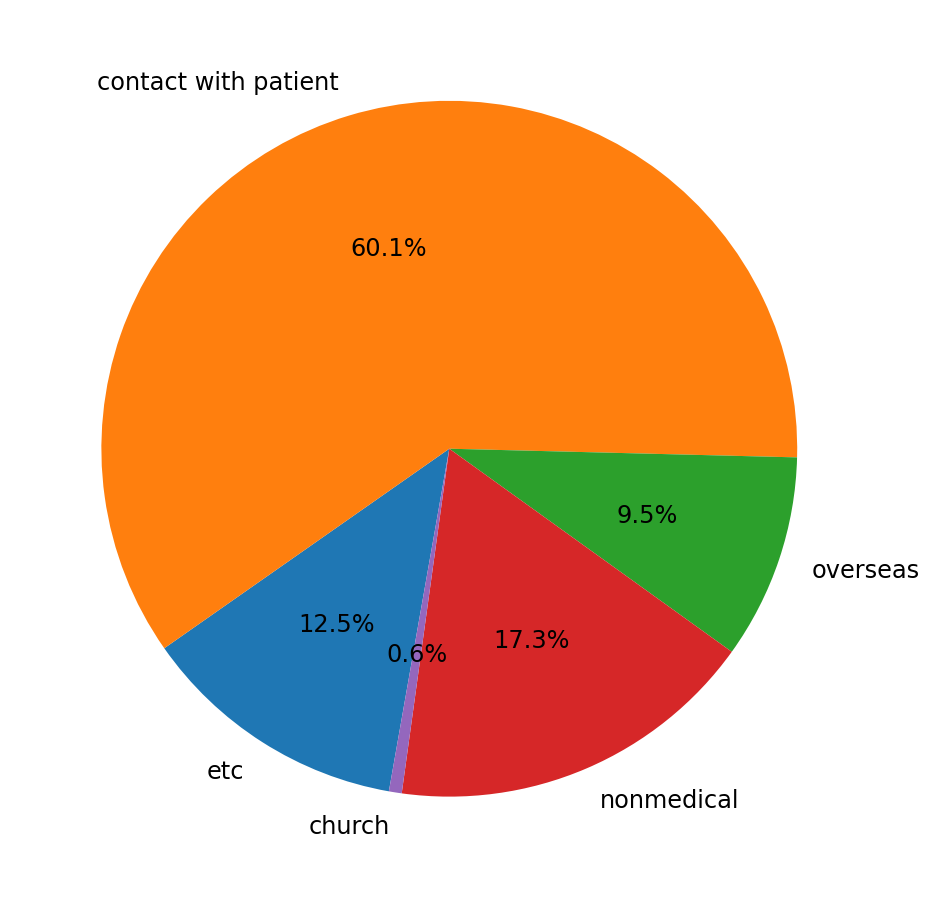

Jeollabuk-do의 감염경로


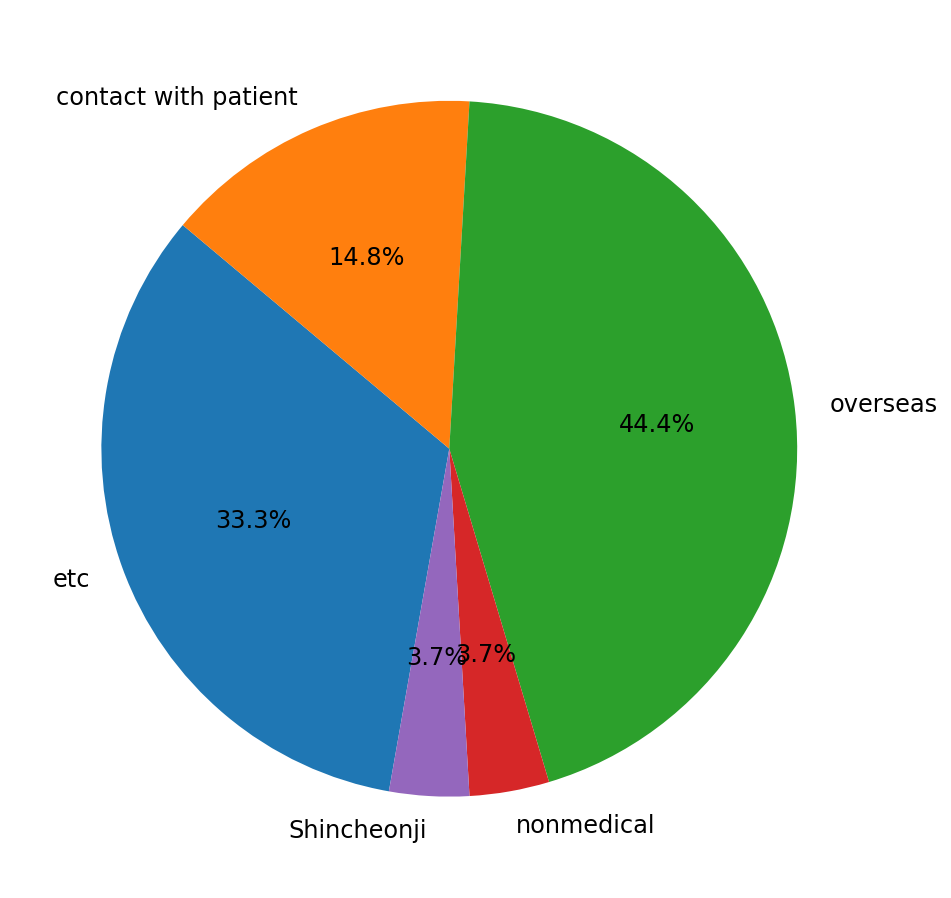

Jeollanam-do의 감염경로


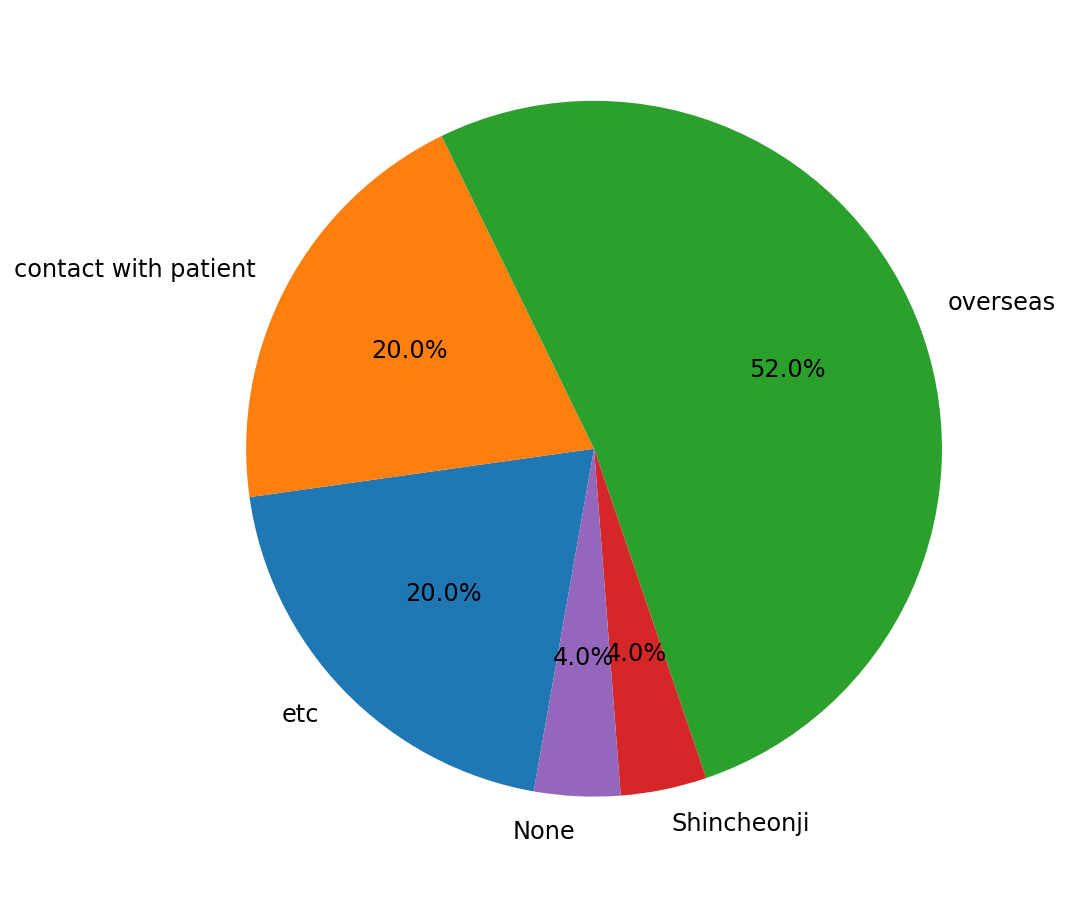

Gyeongsangbuk-do의 감염경로


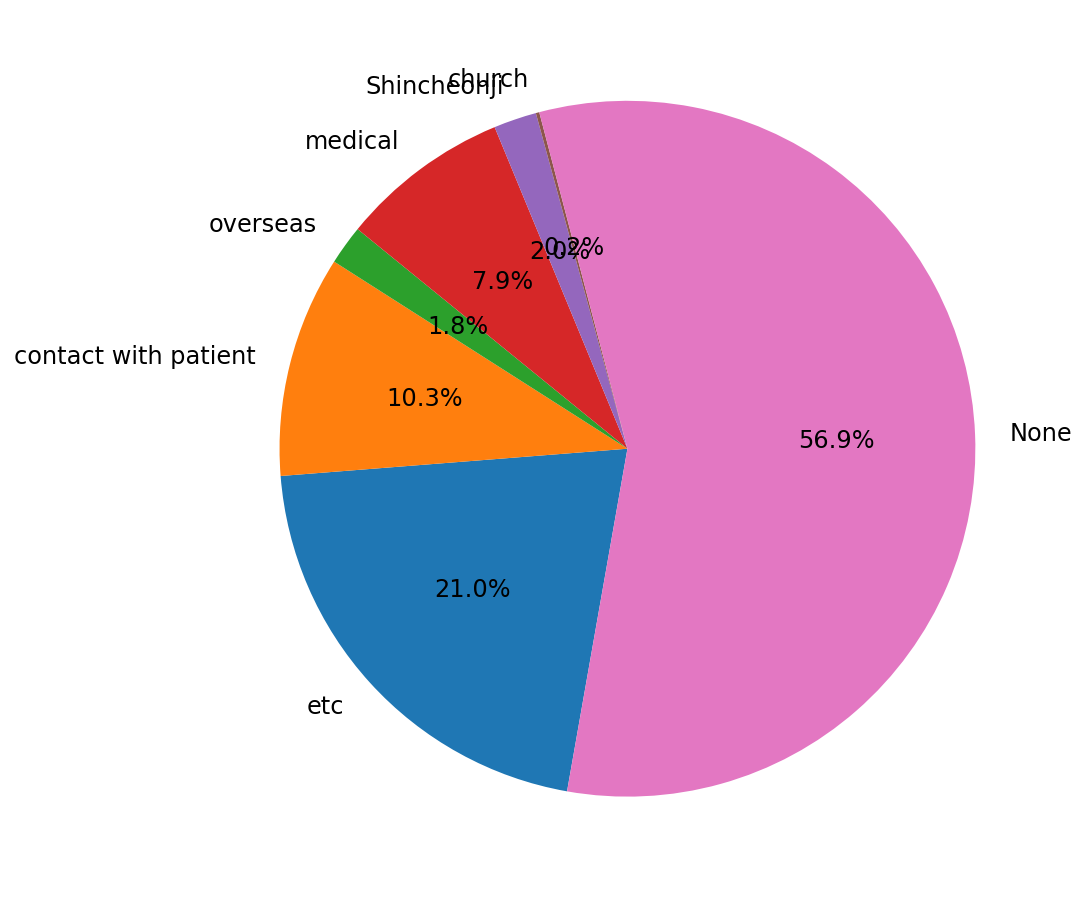

Gyeongsangnam-do의 감염경로


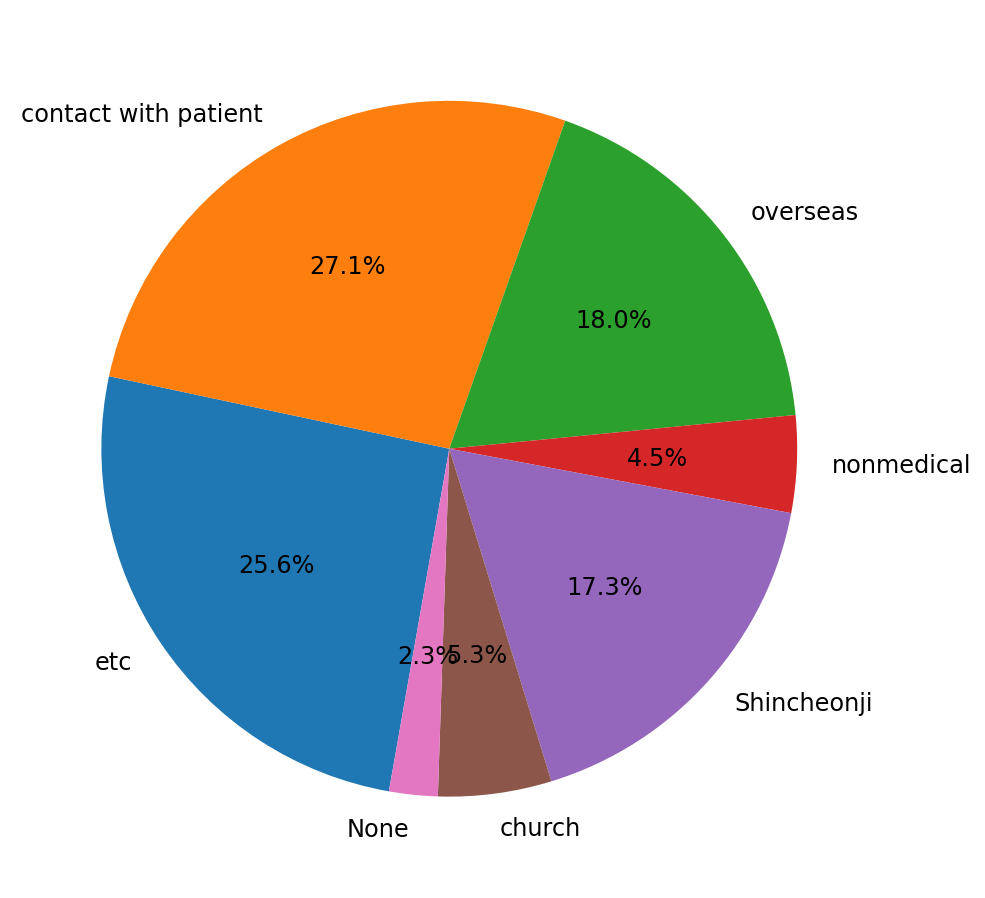

Jeju-do의 감염경로


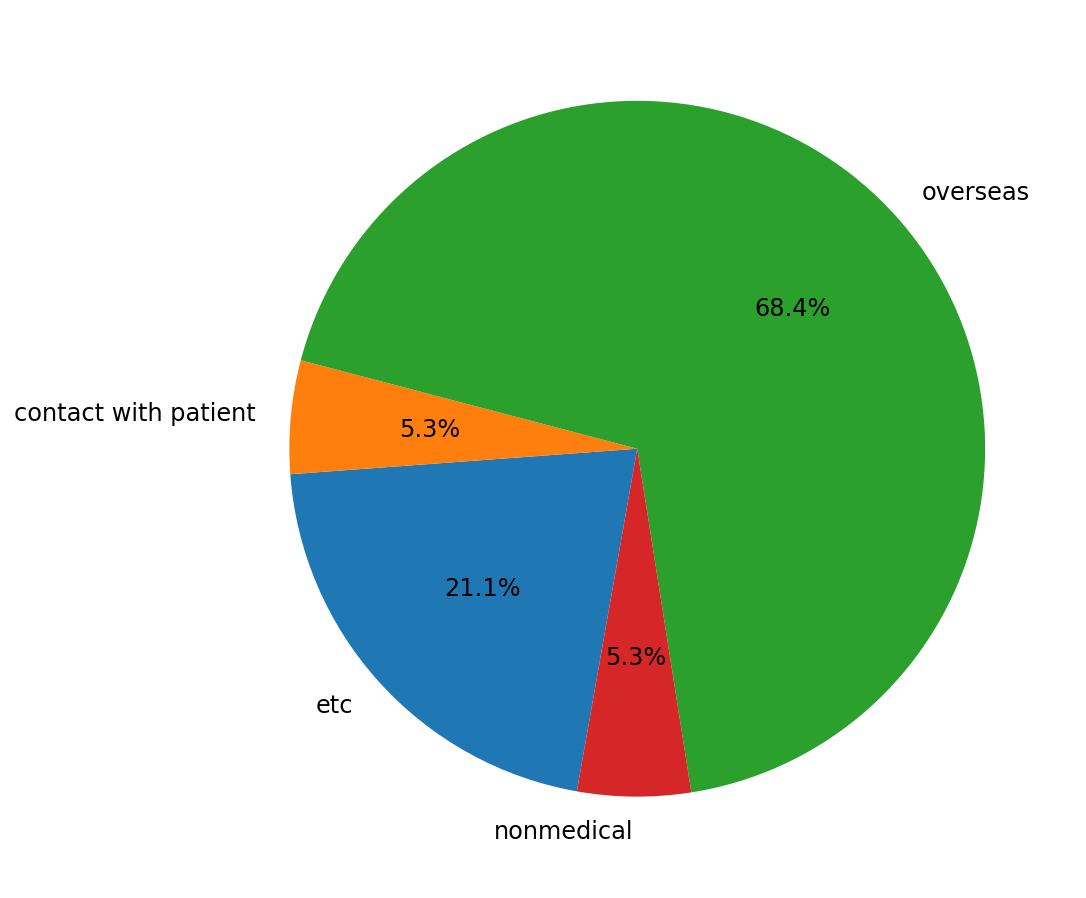

In [106]:
infectioncase=['etc','contact with patient','overseas','medical','nonmedical','GuroCallCenter','Shincheonji','church','None']
for i in range(len(province_list)):
  print("%s의 감염경로"%(province_list[i]))
  z=[]
  z1=[]
  for a in infectioncase:
    if infectioncase_perprovince.loc[i,a]>0:
      z.append(a)
      z1.append(infectioncase_perprovince.loc[i,a])
  labels = z
  plt.pie(z1, labels=z, autopct='%.1f%%', startangle=260, counterclock=False)
  plt.show()

경기도와 인천은 환자 접촉, 서울은 nonmedical, 경북&대구는 None의 감염경로가 제일 많이 차지합니다.

그리고 None이 특히 대구, 경북에 많이 존재하는 것이 보입니다.

**2-1. 각 지역 중 급격히 확진자가 뛴 시기의 감염경로 탐색**

In [ ]:
#1번에서 살펴본 급격히 확진자 추세가 뛴 지역과 시기를 중점으로 살펴보자

**2-1-1. 대구,경북의 2.22-3.10**

In [121]:
D=pd.DataFrame({'etc':[0],'contact with patient':[0],'overseas':[0],'medical':[0],'nonmedical':[0],'GuroCallCenter':[0],'Shincheonji':[0],'church':[0],'None':[0]})
Gb=pd.DataFrame({'etc':[0],'contact with patient':[0],'overseas':[0],'medical':[0],'nonmedical':[0],'GuroCallCenter':[0],'Shincheonji':[0],'church':[0],'None':[0]})
S=pd.DataFrame({'etc':[0],'contact with patient':[0],'overseas':[0],'medical':[0],'nonmedical':[0],'GuroCallCenter':[0],'Shincheonji':[0],'church':[0],'None':[0]})
Gi=pd.DataFrame({'etc':[0],'contact with patient':[0],'overseas':[0],'medical':[0],'nonmedical':[0],'GuroCallCenter':[0],'Shincheonji':[0],'church':[0],'None':[0]})
D1=pd.DataFrame({'etc':[0],'contact with patient':[0],'overseas':[0],'medical':[0],'nonmedical':[0],'GuroCallCenter':[0],'Shincheonji':[0],'church':[0],'None':[0]})
Gb1=pd.DataFrame({'etc':[0],'contact with patient':[0],'overseas':[0],'medical':[0],'nonmedical':[0],'GuroCallCenter':[0],'Shincheonji':[0],'church':[0],'None':[0]})

for a in range(len(PatientInfo)):
  if PatientInfo.loc[a,'province']=='Daegu' and PatientInfo.loc[a,'confirmed_date']>='2020-02-20' and PatientInfo.loc[a,'confirmed_date']<='2020-03-10':
    for b in range(len(infectioncase)):
      if PatientInfo.loc[a,'infection']==infectioncase[b]:
        D[infectioncase[b]]+=1
  if PatientInfo.loc[a,'province']=='Daegu' and PatientInfo.loc[a,'confirmed_date']>='2020-03-11' and PatientInfo.loc[a,'confirmed_date']<='2020-04-10':
    for b in range(len(infectioncase)):
      if PatientInfo.loc[a,'infection']==infectioncase[b]:
        D1[infectioncase[b]]+=1
  if PatientInfo.loc[a,'province']=='Gyeongsangbuk-do' and PatientInfo.loc[a,'confirmed_date']>='2020-02-20' and PatientInfo.loc[a,'confirmed_date']<='2020-03-10':
    for b in range(len(infectioncase)):
      if PatientInfo.loc[a,'infection']==infectioncase[b]:
        Gb[infectioncase[b]]+=1
  if PatientInfo.loc[a,'province']=='Gyeongsangbuk-do' and PatientInfo.loc[a,'confirmed_date']>='2020-03-11' and PatientInfo.loc[a,'confirmed_date']<='2020-04-10':
    for b in range(len(infectioncase)):
      if PatientInfo.loc[a,'infection']==infectioncase[b]:
        Gb1[infectioncase[b]]+=1
  if PatientInfo.loc[a,'province']=='Seoul' and PatientInfo.loc[a,'confirmed_date']>='2020-02-20' and PatientInfo.loc[a,'confirmed_date']<='2020-03-10':
    for b in range(len(infectioncase)):
      if PatientInfo.loc[a,'infection']==infectioncase[b]:
        S[infectioncase[b]]+=1
  if PatientInfo.loc[a,'province']=='Gyeonggi-do' and PatientInfo.loc[a,'confirmed_date']>='2020-02-20' and PatientInfo.loc[a,'confirmed_date']<='2020-03-10':
    for b in range(len(infectioncase)):
      if PatientInfo.loc[a,'infection']==infectioncase[b]:
        Gi[infectioncase[b]]+=1

대구&경북의 감염경로(2020.02.20~2020.03.10)


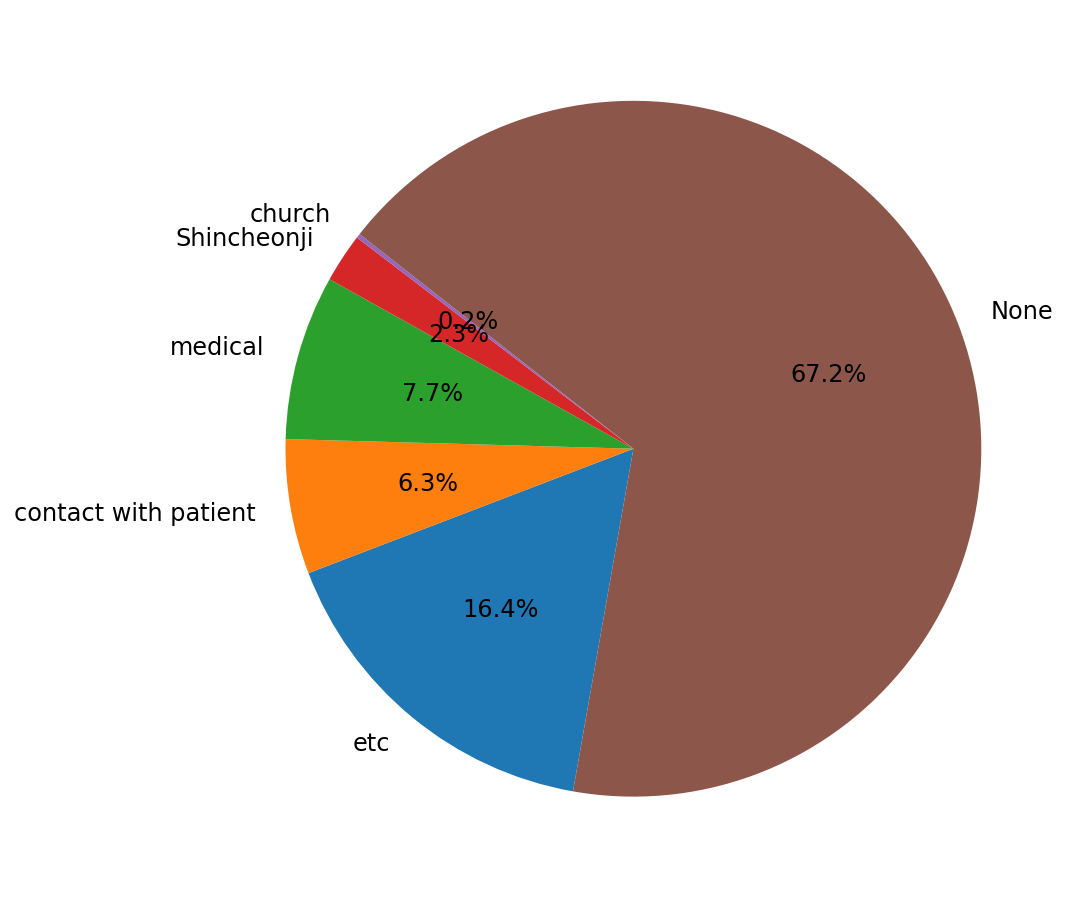

In [117]:
print("대구&경북의 감염경로(2020.02.20~2020.03.10)")
z=[]
z1=[]
for a in range(len(infectioncase)):
  if D.iloc[0,a]>0 or Gb.iloc[0,a]:
    z.append(infectioncase[a])
    z1.append(D.iloc[0,a]+Gb.iloc[0,a])
labels = z
plt.pie(z1, labels=z, autopct='%.1f%%', startangle=260, counterclock=False)
plt.show()

대구&경북의 감염경로(2020.03.11~2020.04.10)


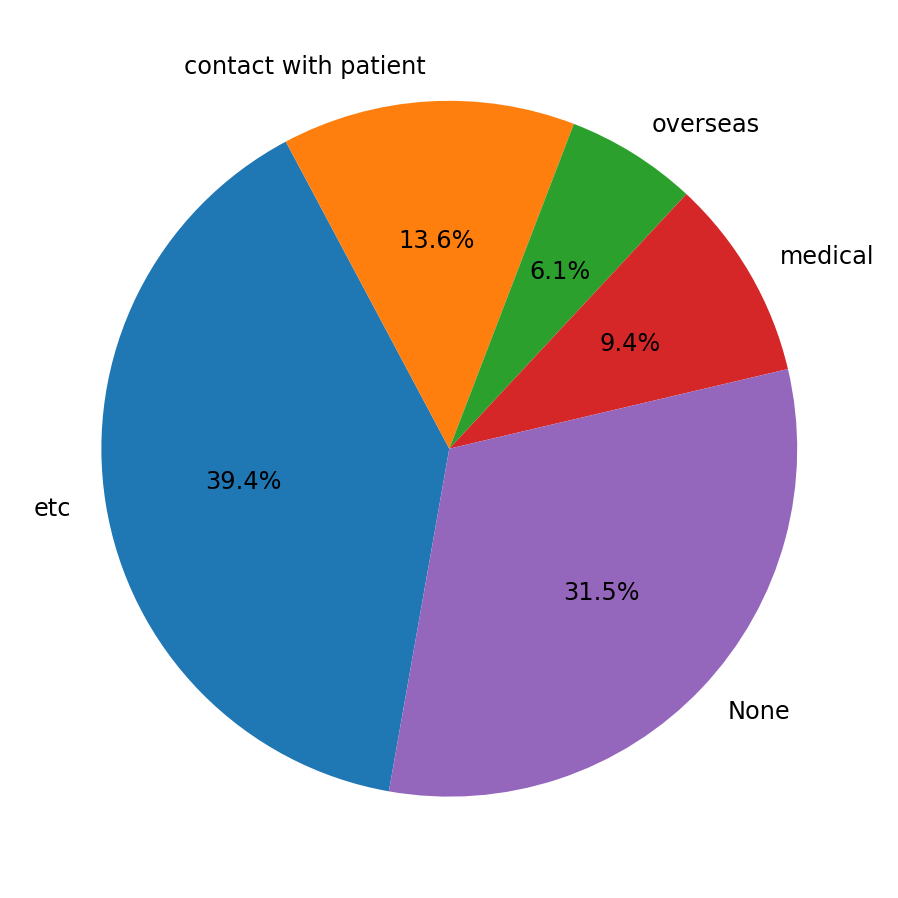

In [122]:
print("대구&경북의 감염경로(2020.03.11~2020.04.10)")
z=[]
z1=[]
for a in range(len(infectioncase)):
  if D1.iloc[0,a]>0 or Gb1.iloc[0,a]:
    z.append(infectioncase[a])
    z1.append(D1.iloc[0,a]+Gb1.iloc[0,a])
labels = z
plt.pie(z1, labels=z, autopct='%.1f%%', startangle=260, counterclock=False)
plt.show()

대구&경북의 감염경로를 3.10기준으로 전은 None과 신천지 비율이 높은데 그 후는 신천지가 아예 없어지고 None도 그만큼 줄었습니다.

그래서 None의 대다수가 신천지가 포함되어있지않을까 예상됩니다.

서울&경기의 감염경로(2020.02.20~2020.03.10)


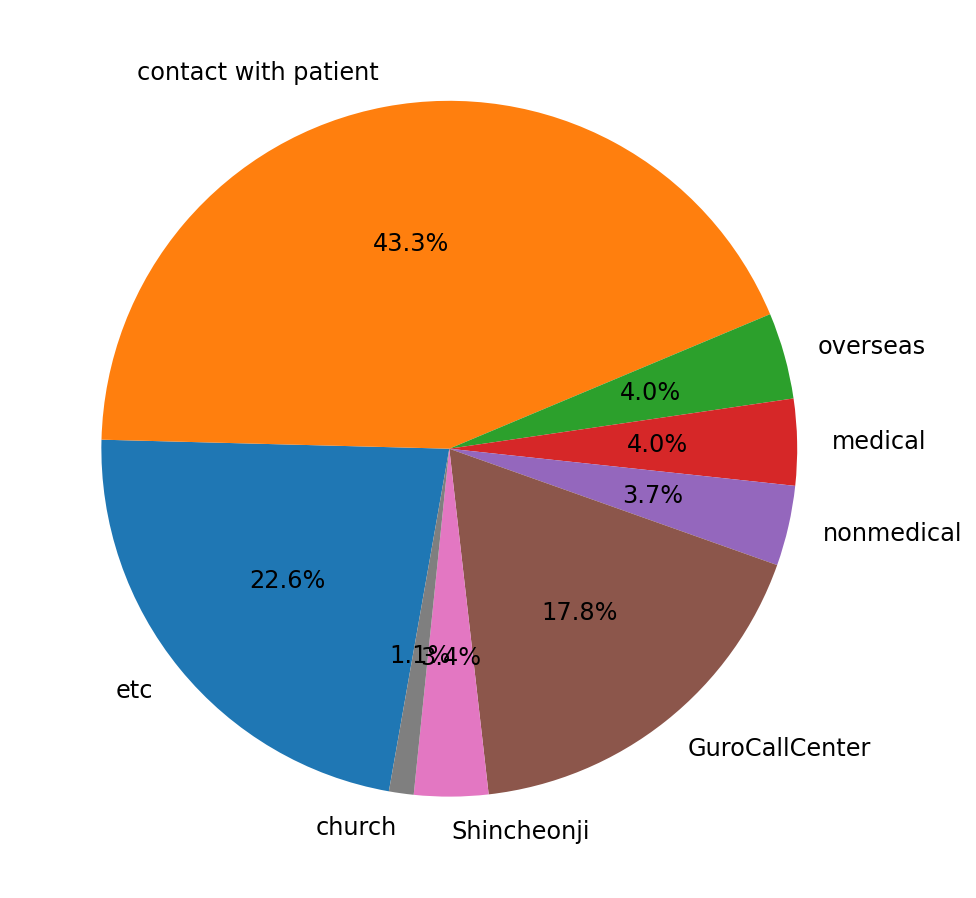

In [118]:
print("서울&경기의 감염경로(2020.02.20~2020.03.10)")
z=[]
z1=[]
for a in range(len(infectioncase)):
  if S.iloc[0,a]>0 or Gi.iloc[0,a]:
    z.append(infectioncase[a])
    z1.append(S.iloc[0,a]+Gi.iloc[0,a])
labels = z
plt.pie(z1, labels=z, autopct='%.1f%%', startangle=260, counterclock=False)
plt.show()

서울&경기는 None이 존재하지 않지만 경북&대구에는 많은 부분을 차지하므로 더욱 신천지가 포함되었을꺼라고 예상됩니다.

**2-2-2. 서울,경기,인천 5.26-6.30**

In [123]:
D=pd.DataFrame({'etc':[0],'contact with patient':[0],'overseas':[0],'medical':[0],'nonmedical':[0],'GuroCallCenter':[0],'Shincheonji':[0],'church':[0],'None':[0]})
G=pd.DataFrame({'etc':[0],'contact with patient':[0],'overseas':[0],'medical':[0],'nonmedical':[0],'GuroCallCenter':[0],'Shincheonji':[0],'church':[0],'None':[0]})
I=pd.DataFrame({'etc':[0],'contact with patient':[0],'overseas':[0],'medical':[0],'nonmedical':[0],'GuroCallCenter':[0],'Shincheonji':[0],'church':[0],'None':[0]})
D1=pd.DataFrame({'etc':[0],'contact with patient':[0],'overseas':[0],'medical':[0],'nonmedical':[0],'GuroCallCenter':[0],'Shincheonji':[0],'church':[0],'None':[0]})
G1=pd.DataFrame({'etc':[0],'contact with patient':[0],'overseas':[0],'medical':[0],'nonmedical':[0],'GuroCallCenter':[0],'Shincheonji':[0],'church':[0],'None':[0]})
I1=pd.DataFrame({'etc':[0],'contact with patient':[0],'overseas':[0],'medical':[0],'nonmedical':[0],'GuroCallCenter':[0],'Shincheonji':[0],'church':[0],'None':[0]})

for a in range(len(PatientInfo)):
  if PatientInfo.loc[a,'province']=='Seoul' and PatientInfo.loc[a,'confirmed_date']>='2020-05-26' and PatientInfo.loc[a,'confirmed_date']<='2020-06-30':
    for b in range(len(infectioncase)):
      if PatientInfo.loc[a,'infection']==infectioncase[b]:
        D[infectioncase[b]]+=1
  if PatientInfo.loc[a,'province']=='Seoul' and PatientInfo.loc[a,'confirmed_date']>='2020-05-01' and PatientInfo.loc[a,'confirmed_date']<='2020-05-25':
    for b in range(len(infectioncase)):
      if PatientInfo.loc[a,'infection']==infectioncase[b]:
        D1[infectioncase[b]]+=1
  if PatientInfo.loc[a,'province']=='Gyeonggi-do' and PatientInfo.loc[a,'confirmed_date']>='2020-05-26' and PatientInfo.loc[a,'confirmed_date']<='2020-06-30':
    for b in range(len(infectioncase)):
      if PatientInfo.loc[a,'infection']==infectioncase[b]:
        G[infectioncase[b]]+=1
  if PatientInfo.loc[a,'province']=='Gyeonggi-do' and PatientInfo.loc[a,'confirmed_date']>='2020-05-01' and PatientInfo.loc[a,'confirmed_date']<='2020-05-25':
    for b in range(len(infectioncase)):
      if PatientInfo.loc[a,'infection']==infectioncase[b]:
        G1[infectioncase[b]]+=1
  if PatientInfo.loc[a,'province']=='Incheon' and PatientInfo.loc[a,'confirmed_date']>='2020-05-26' and PatientInfo.loc[a,'confirmed_date']<='2020-06-30':
    for b in range(len(infectioncase)):
      if PatientInfo.loc[a,'infection']==infectioncase[b]:
        I[infectioncase[b]]+=1
  if PatientInfo.loc[a,'province']=='Incheon' and PatientInfo.loc[a,'confirmed_date']>='2020-05-01' and PatientInfo.loc[a,'confirmed_date']<='2020-05-25':
    for b in range(len(infectioncase)):
      if PatientInfo.loc[a,'infection']==infectioncase[b]:
        I1[infectioncase[b]]+=1

서울 감염경로(2020.05.01~2020.05.25)


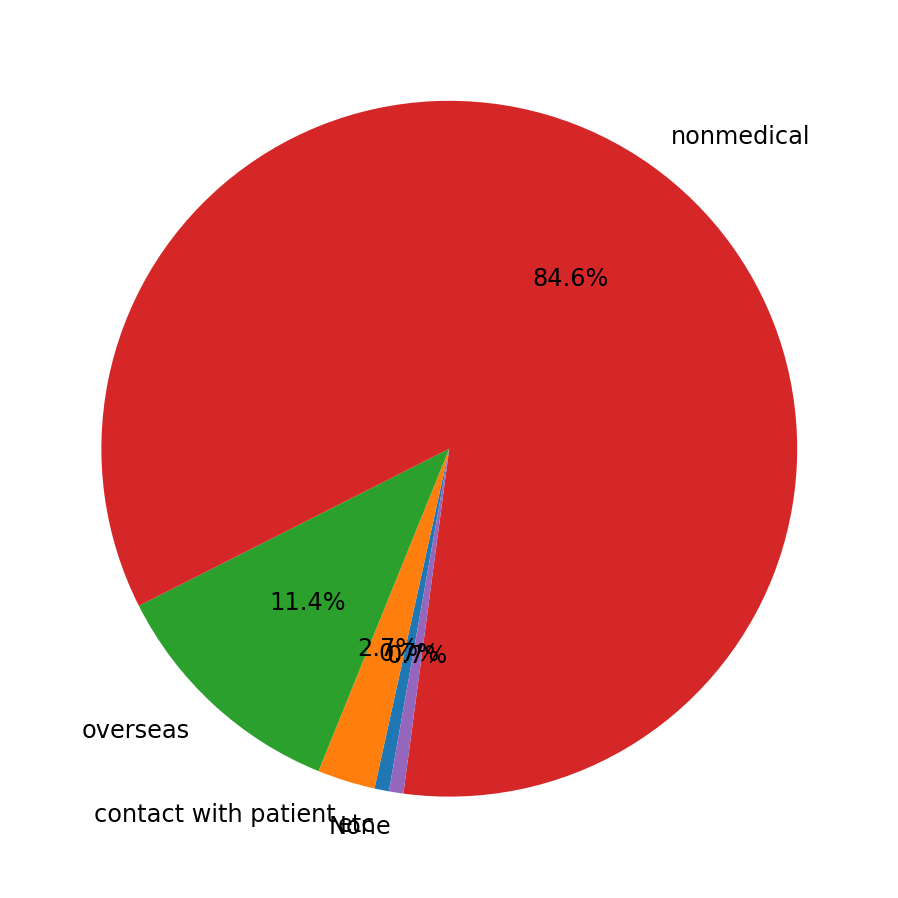

In [124]:
print("서울 감염경로(2020.05.01~2020.05.25)")
z=[]
z1=[]
for a in range(len(infectioncase)):
  if D1.iloc[0,a]>0:
    z.append(infectioncase[a])
    z1.append(D1.iloc[0,a])
labels = z
plt.pie(z1, labels=z, autopct='%.1f%%', startangle=260, counterclock=False)
plt.show()

서울 감염경로(2020.05.26~2020.06.30)


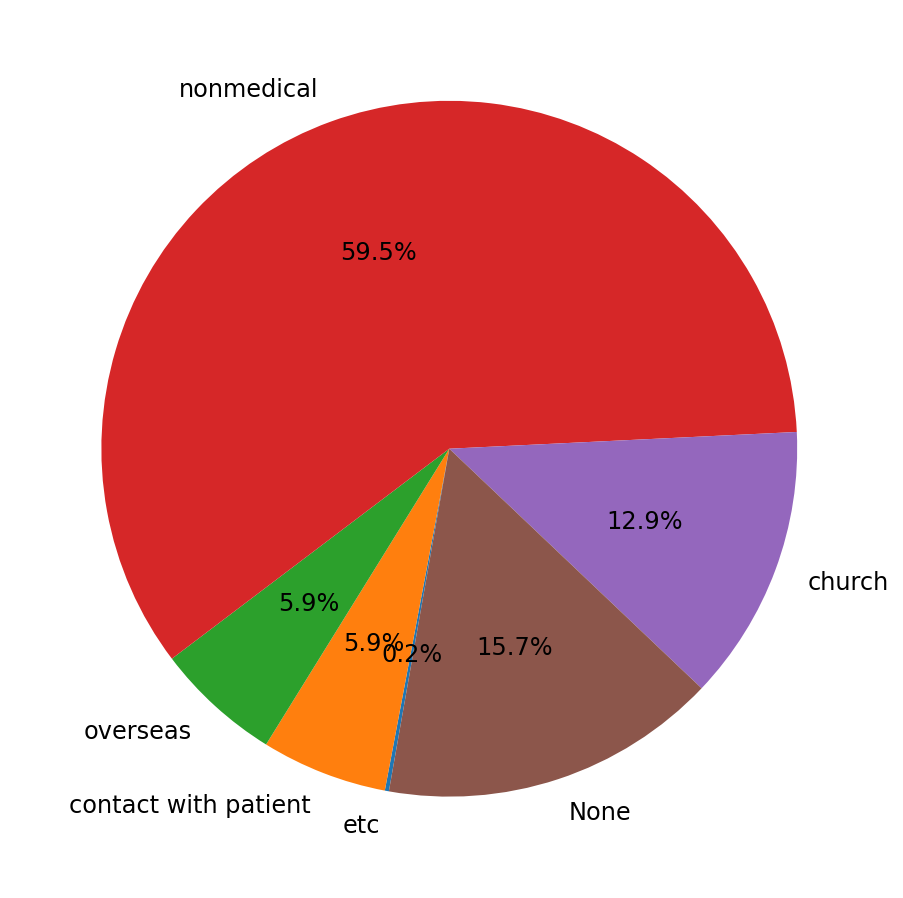

In [125]:
print("서울 감염경로(2020.05.26~2020.06.30)")
z=[]
z1=[]
for a in range(len(infectioncase)):
  if D.iloc[0,a]>0:
    z.append(infectioncase[a])
    z1.append(D.iloc[0,a])
labels = z
plt.pie(z1, labels=z, autopct='%.1f%%', startangle=260, counterclock=False)
plt.show()

경기 감염경로(2020.05.01~2020.05.25)


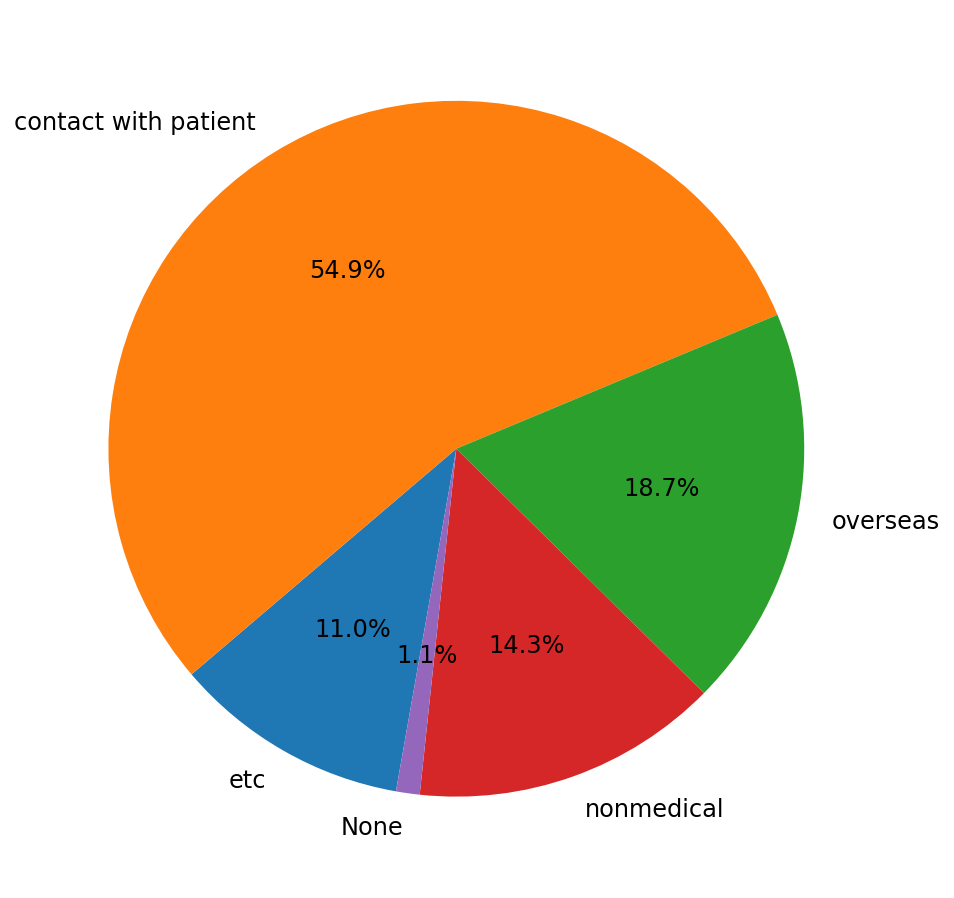

In [126]:
print("경기 감염경로(2020.05.01~2020.05.25)")
z=[]
z1=[]
for a in range(len(infectioncase)):
  if G1.iloc[0,a]>0:
    z.append(infectioncase[a])
    z1.append(G1.iloc[0,a])
labels = z
plt.pie(z1, labels=z, autopct='%.1f%%', startangle=260, counterclock=False)
plt.show()

경기 감염경로(2020.05.26~2020.06.30)


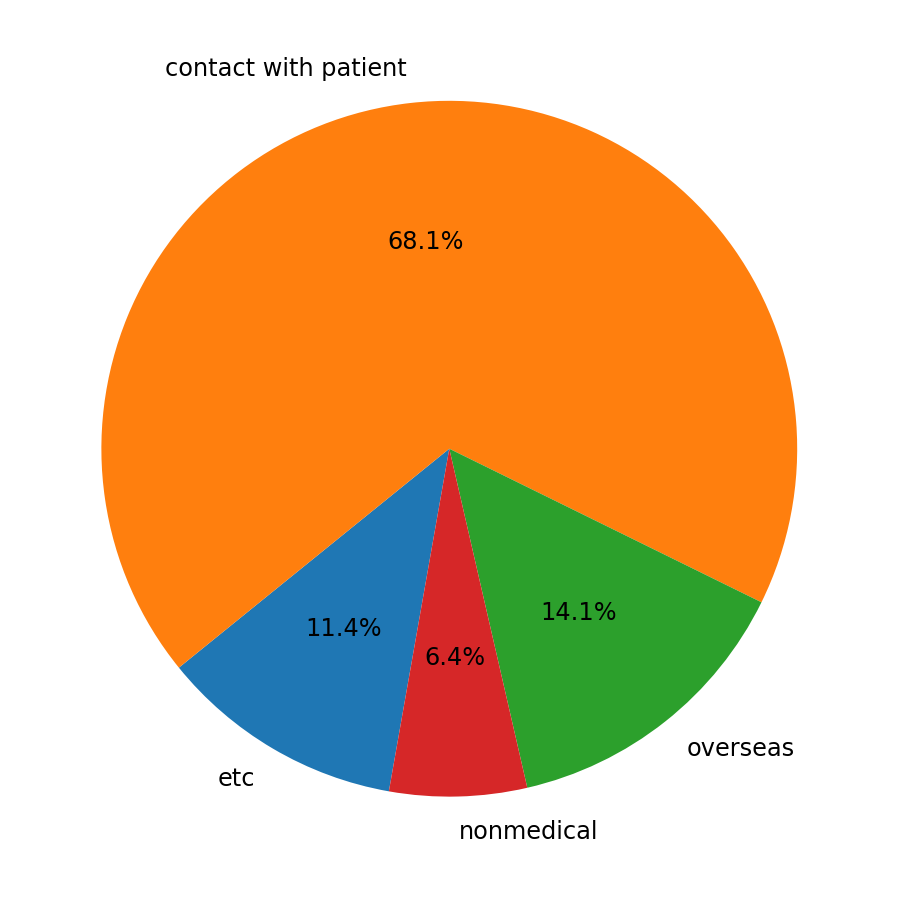

In [127]:
print("경기 감염경로(2020.05.26~2020.06.30)")
z=[]
z1=[]
for a in range(len(infectioncase)):
  if G.iloc[0,a]>0:
    z.append(infectioncase[a])
    z1.append(G.iloc[0,a])
labels = z
plt.pie(z1, labels=z, autopct='%.1f%%', startangle=260, counterclock=False)
plt.show()

인천 감염경로(2020.05.01~2020.05.25)


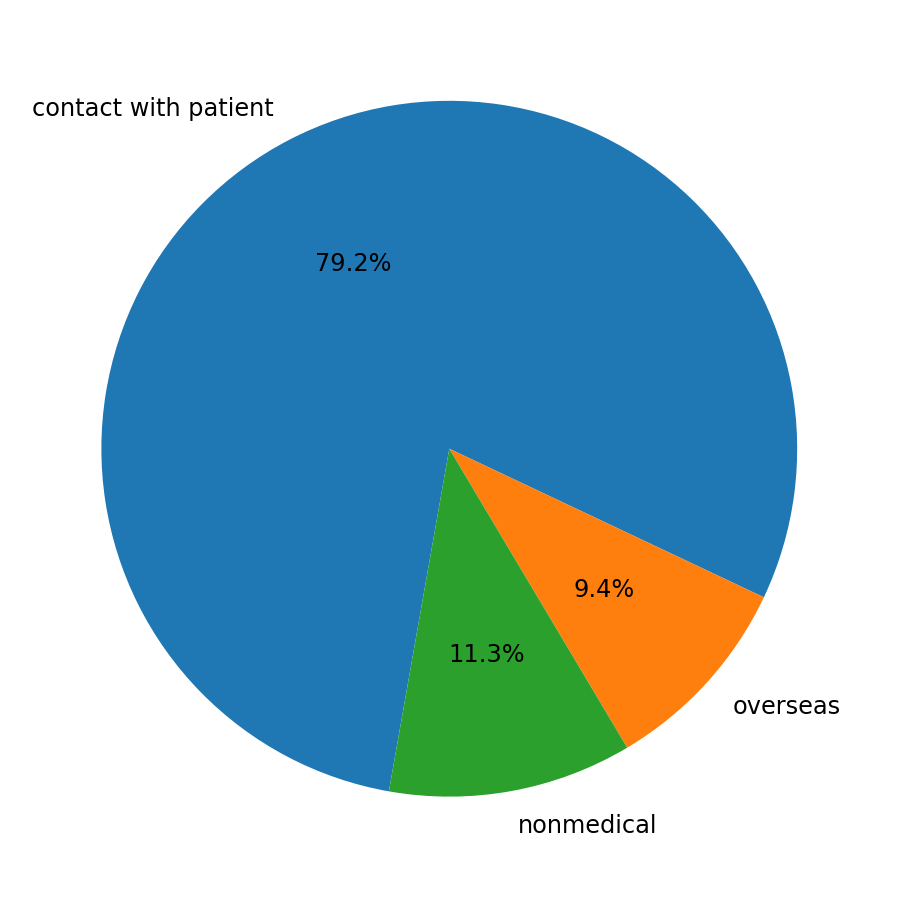

In [128]:
print("인천 감염경로(2020.05.01~2020.05.25)")
z=[]
z1=[]
for a in range(len(infectioncase)):
  if I1.iloc[0,a]>0:
    z.append(infectioncase[a])
    z1.append(I1.iloc[0,a])
labels = z
plt.pie(z1, labels=z, autopct='%.1f%%', startangle=260, counterclock=False)
plt.show()

인천 감염경로(2020.05.26~2020.06.30)


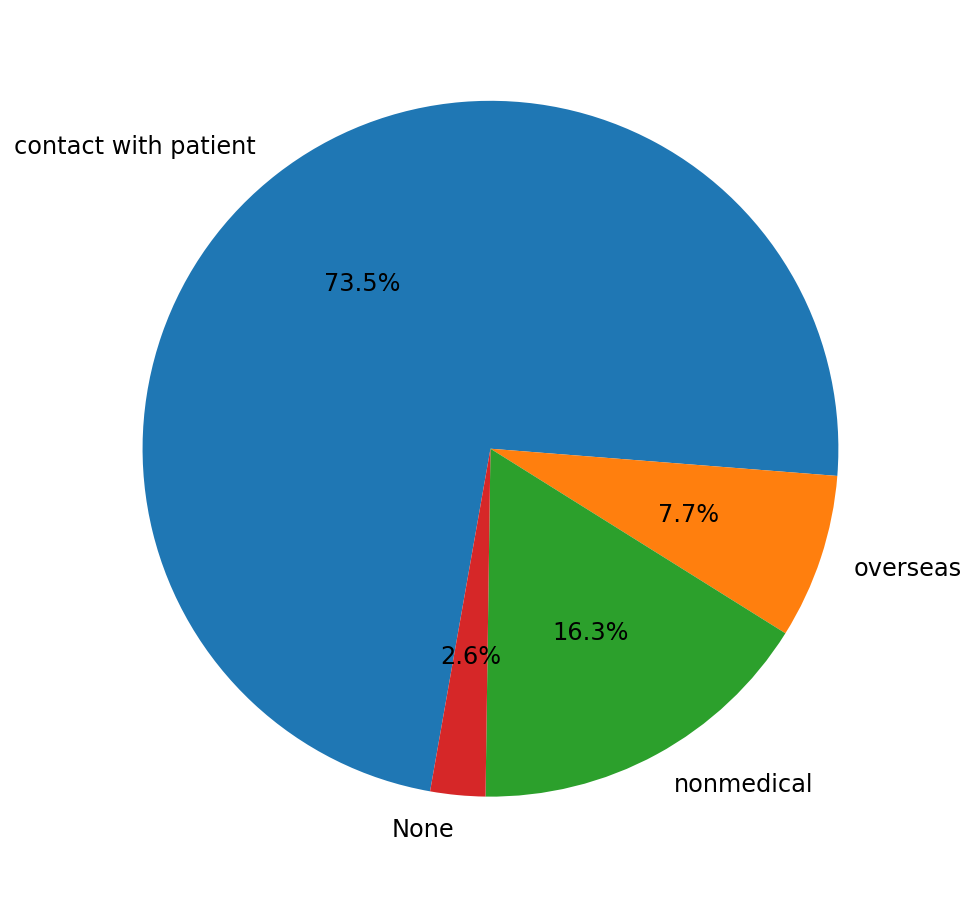

In [129]:
print("인천 감염경로(2020.05.26~2020.06.30)")
z=[]
z1=[]
for a in range(len(infectioncase)):
  if I.iloc[0,a]>0:
    z.append(infectioncase[a])
    z1.append(I.iloc[0,a])
labels = z
plt.pie(z1, labels=z, autopct='%.1f%%', startangle=260, counterclock=False)
plt.show()

**서울&경기&인천 모두 5월 말로 갈수록 contact with patient 감염경로가 많이 늘었습니다.**

**하지만 서울은 여전히 nonmedical 감염경로가 많습니다.**

**2-2. 일별로 지역마다 누적 확진자 감염경로 추이보기**

In [133]:
infectioncase_perprovince

Unnamed: 0           province  etc  ...  Shincheonji  church  None
0            0              Seoul   99  ...            3      85    85
1            1              Busan   23  ...            6      32     1
2            2              Daegu    0  ...           13       0   110
3            3            Incheon    8  ...            2       0     5
4            4            Gwangju   10  ...            0       0     0
5            5            Daejeon   40  ...            1       0     0
6            6              Ulsan    7  ...           11       0     0
7            7             Sejong    5  ...            1       0     0
8            8        Gyeonggi-do  141  ...           10       0     1
9            9         Gangwon-do   14  ...           10       0     0
10          10  Chungcheongbuk-do   20  ...            0       0     0
11          11  Chungcheongnam-do   21  ...            0       1     0
12          12       Jeollabuk-do    9  ...            1       0     0
13          13       Jeollanam-do    5  ...            1       0     1
14          14   Gyeongsangbuk-do  263  ...           25       2   713
15          15   Gyeongsangnam-do   34  ...           23       7     3
16          16            Jeju-do    4  ...            0       0     0

[17 rows x 11 columns]

**2-2-1. 대구&경북 누적 확진자 감영경로 추이**

In [133]:
#대구&경북의 추세를 보면 신천지와 None의 증가추세가 유사하므로 None에 신천지가 많이 포함되어있음을 알 수 있습니다.

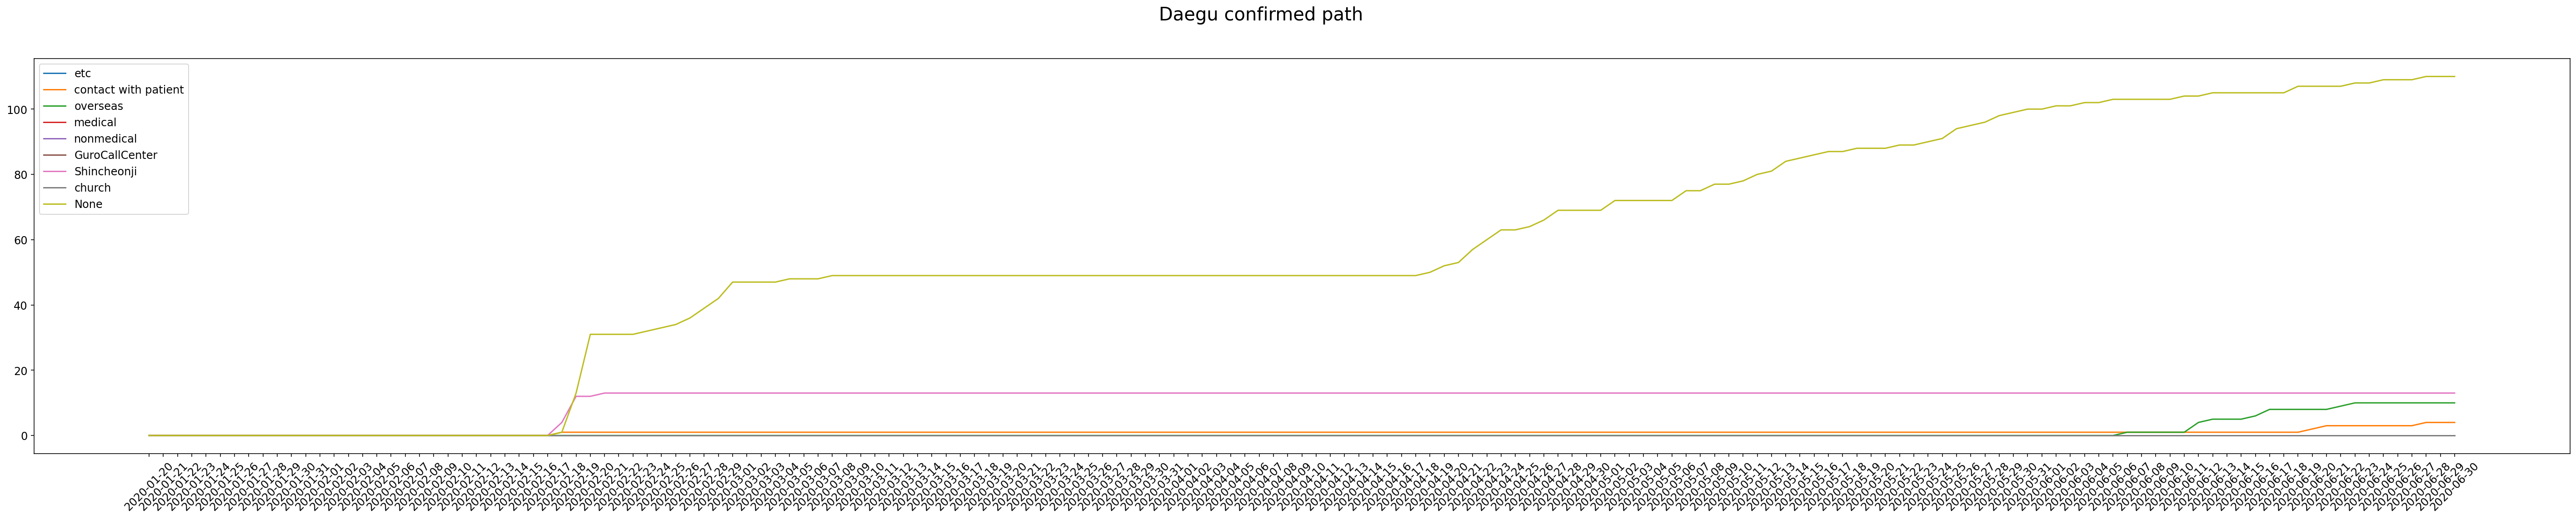

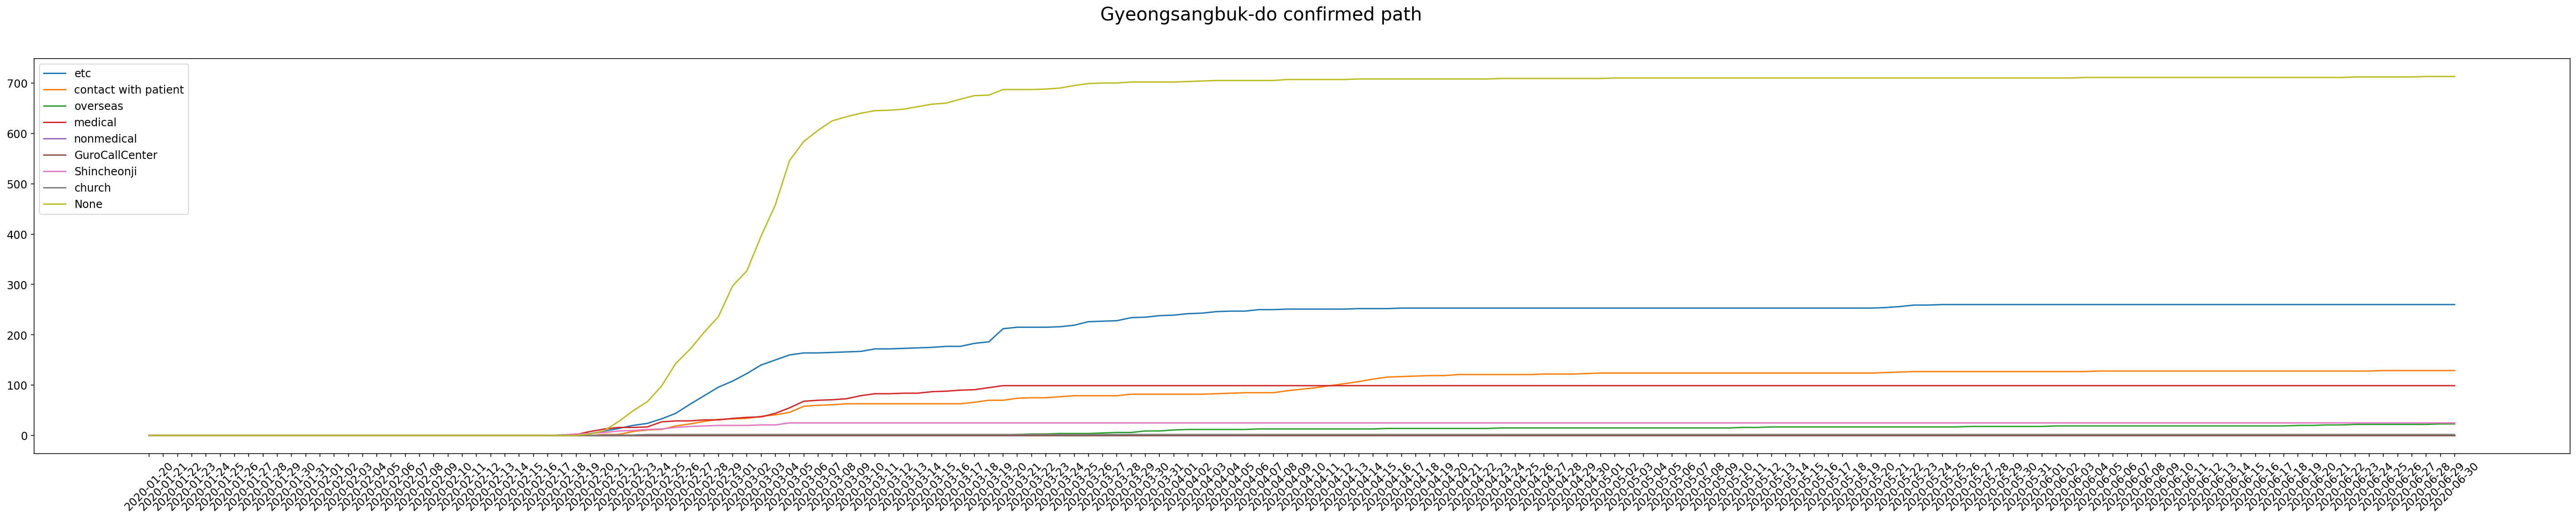

**2-2-2. 수도권 누적 확진자 감영경로 추이**

In [ ]:
#경기&인천의 확진경로를 보면 초반에 해외유입과 환자접촉이 증가하다 5.26부터 환자접촉이 급증했습니다.

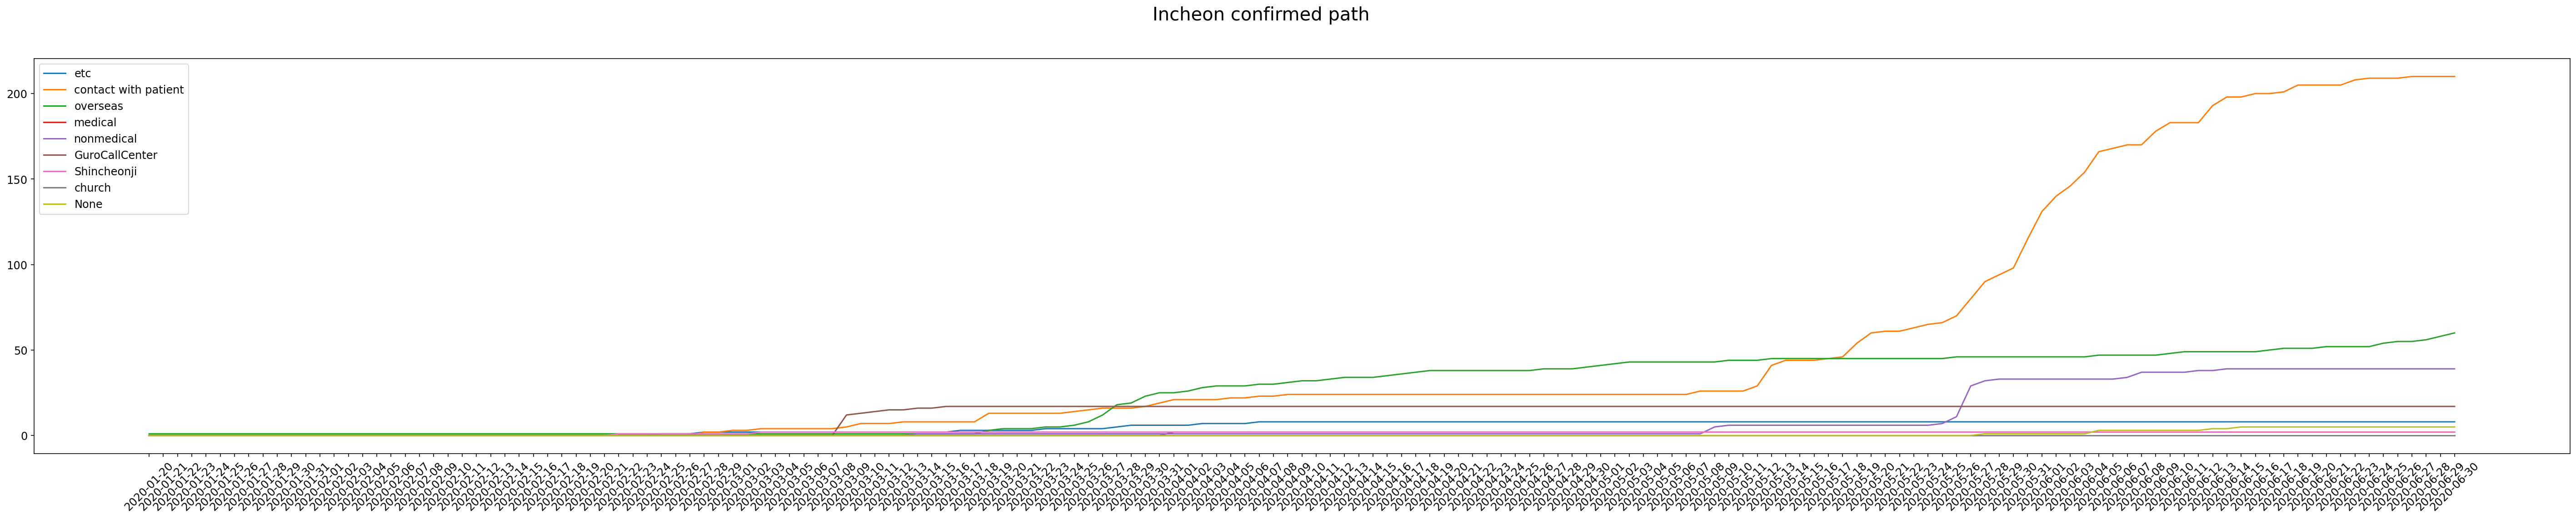

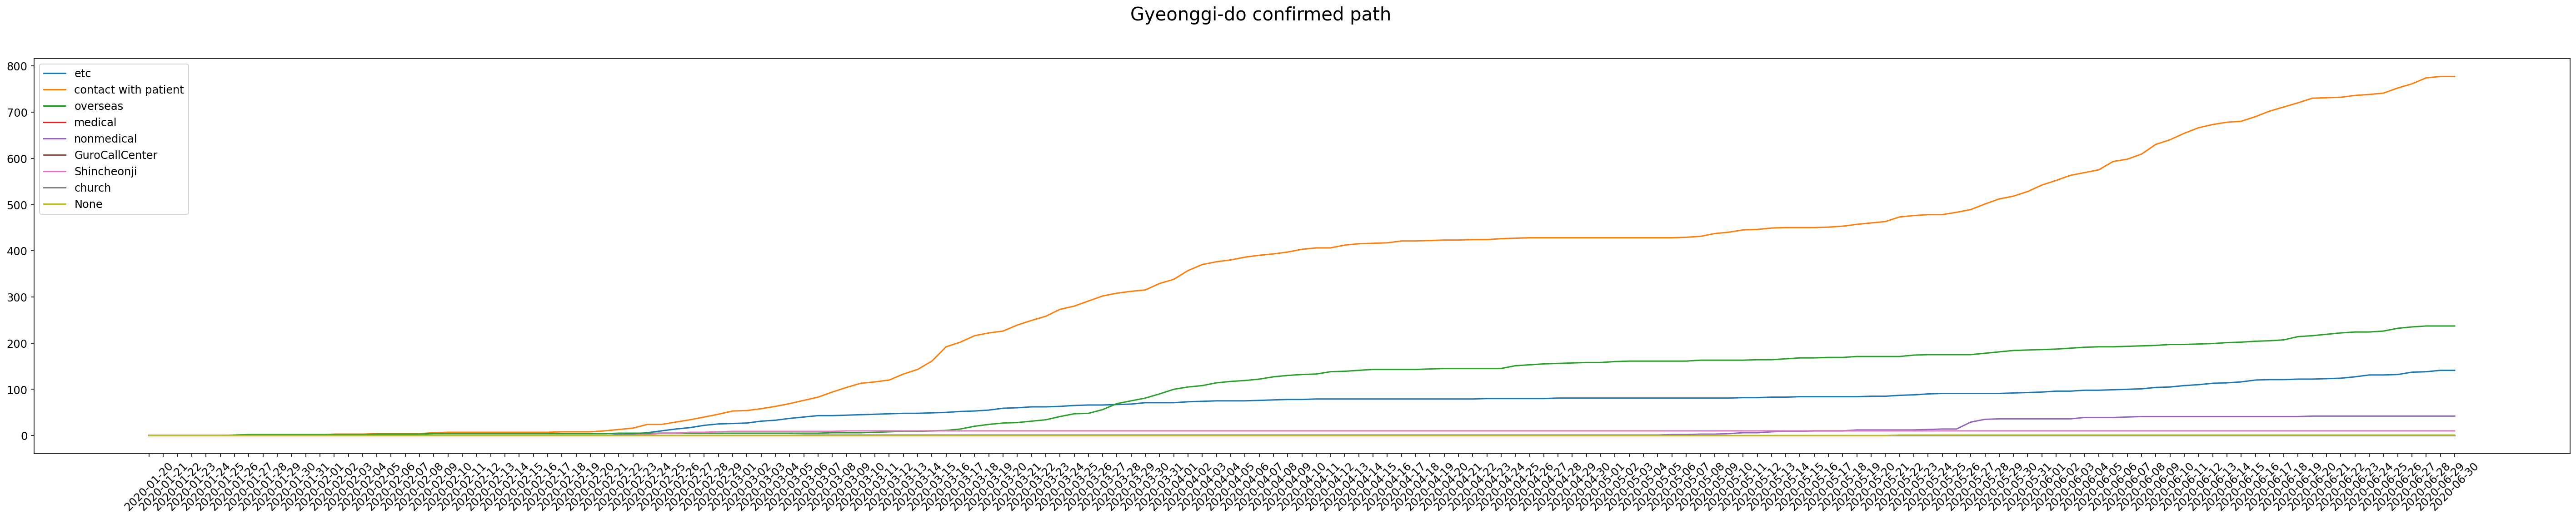

**몇몇 감염경로는 근접 지역적인 부분이라면 유사한 감염경로를 띌 수 있을 것으로 예상됩니다.**

**2-2-3. 한국 누적 확진자 감영경로 추이**

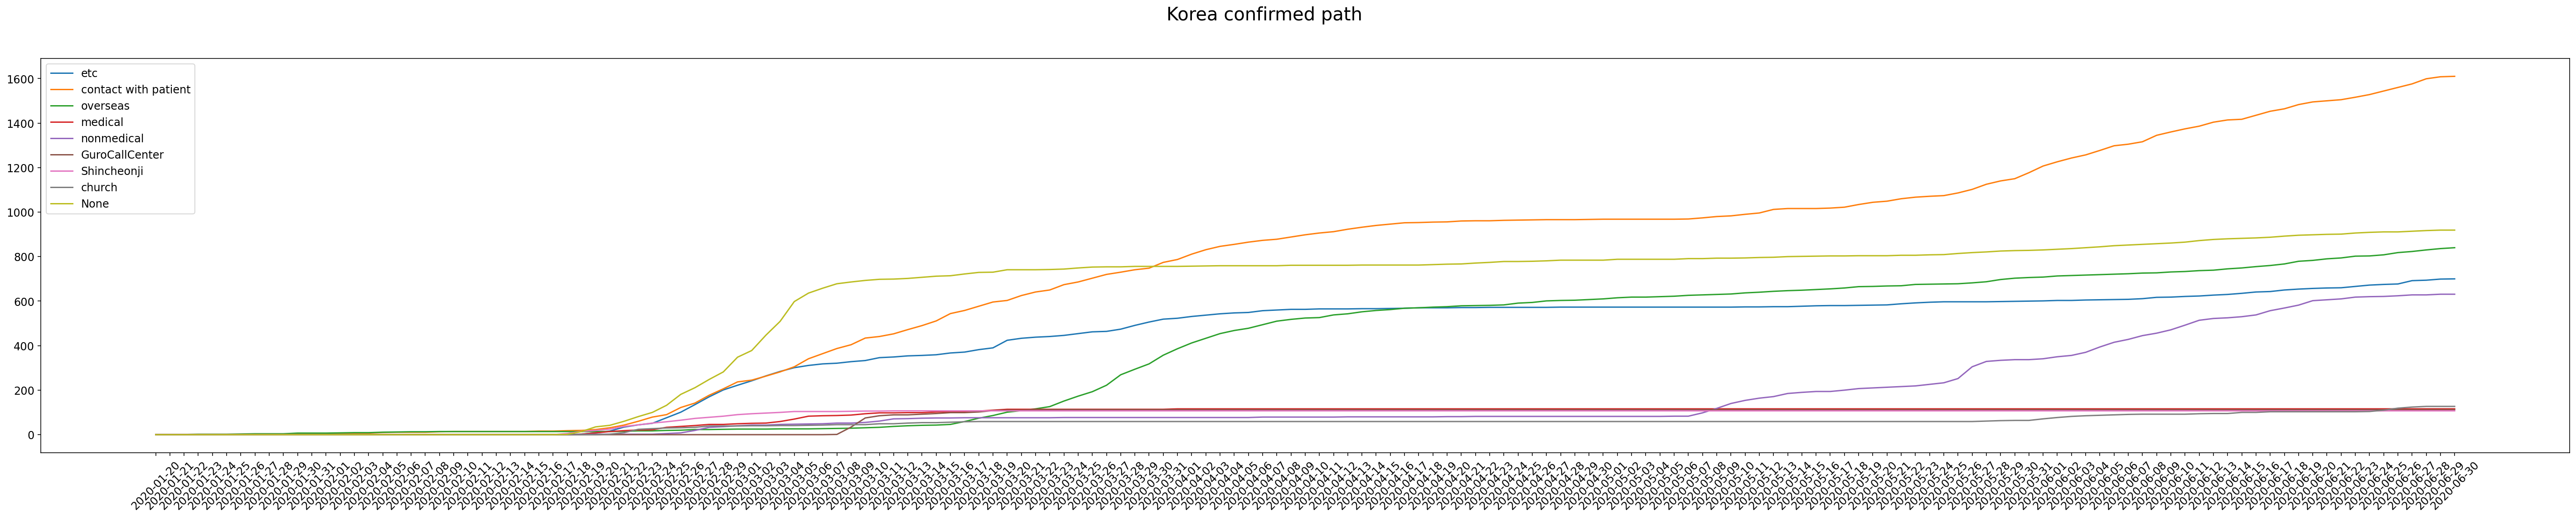

**전체 감염 경로를 보면 초반에 신천지로 감염자가 늘다가 해외유입 그리고 환자접촉으로 많이 늘었음을 보여줍니다.**

# 3. 지역별 의료 인프라(인구수/의료기관수)와 인구밀도에 따라 코로나 회복기간, 확진검증기간(검진속도)이 지역마다 차이가 날까? 

(의료기관비율과 인구밀도가 작으면 감염자, 회복, 진단 기간이 짧고 적거나 감염경로와 연관이 있을까?)

**3-1. 검진속도, 회복속도와 의료기관비율과 인구밀도와의 상관관계**

<function matplotlib.pyplot.show>

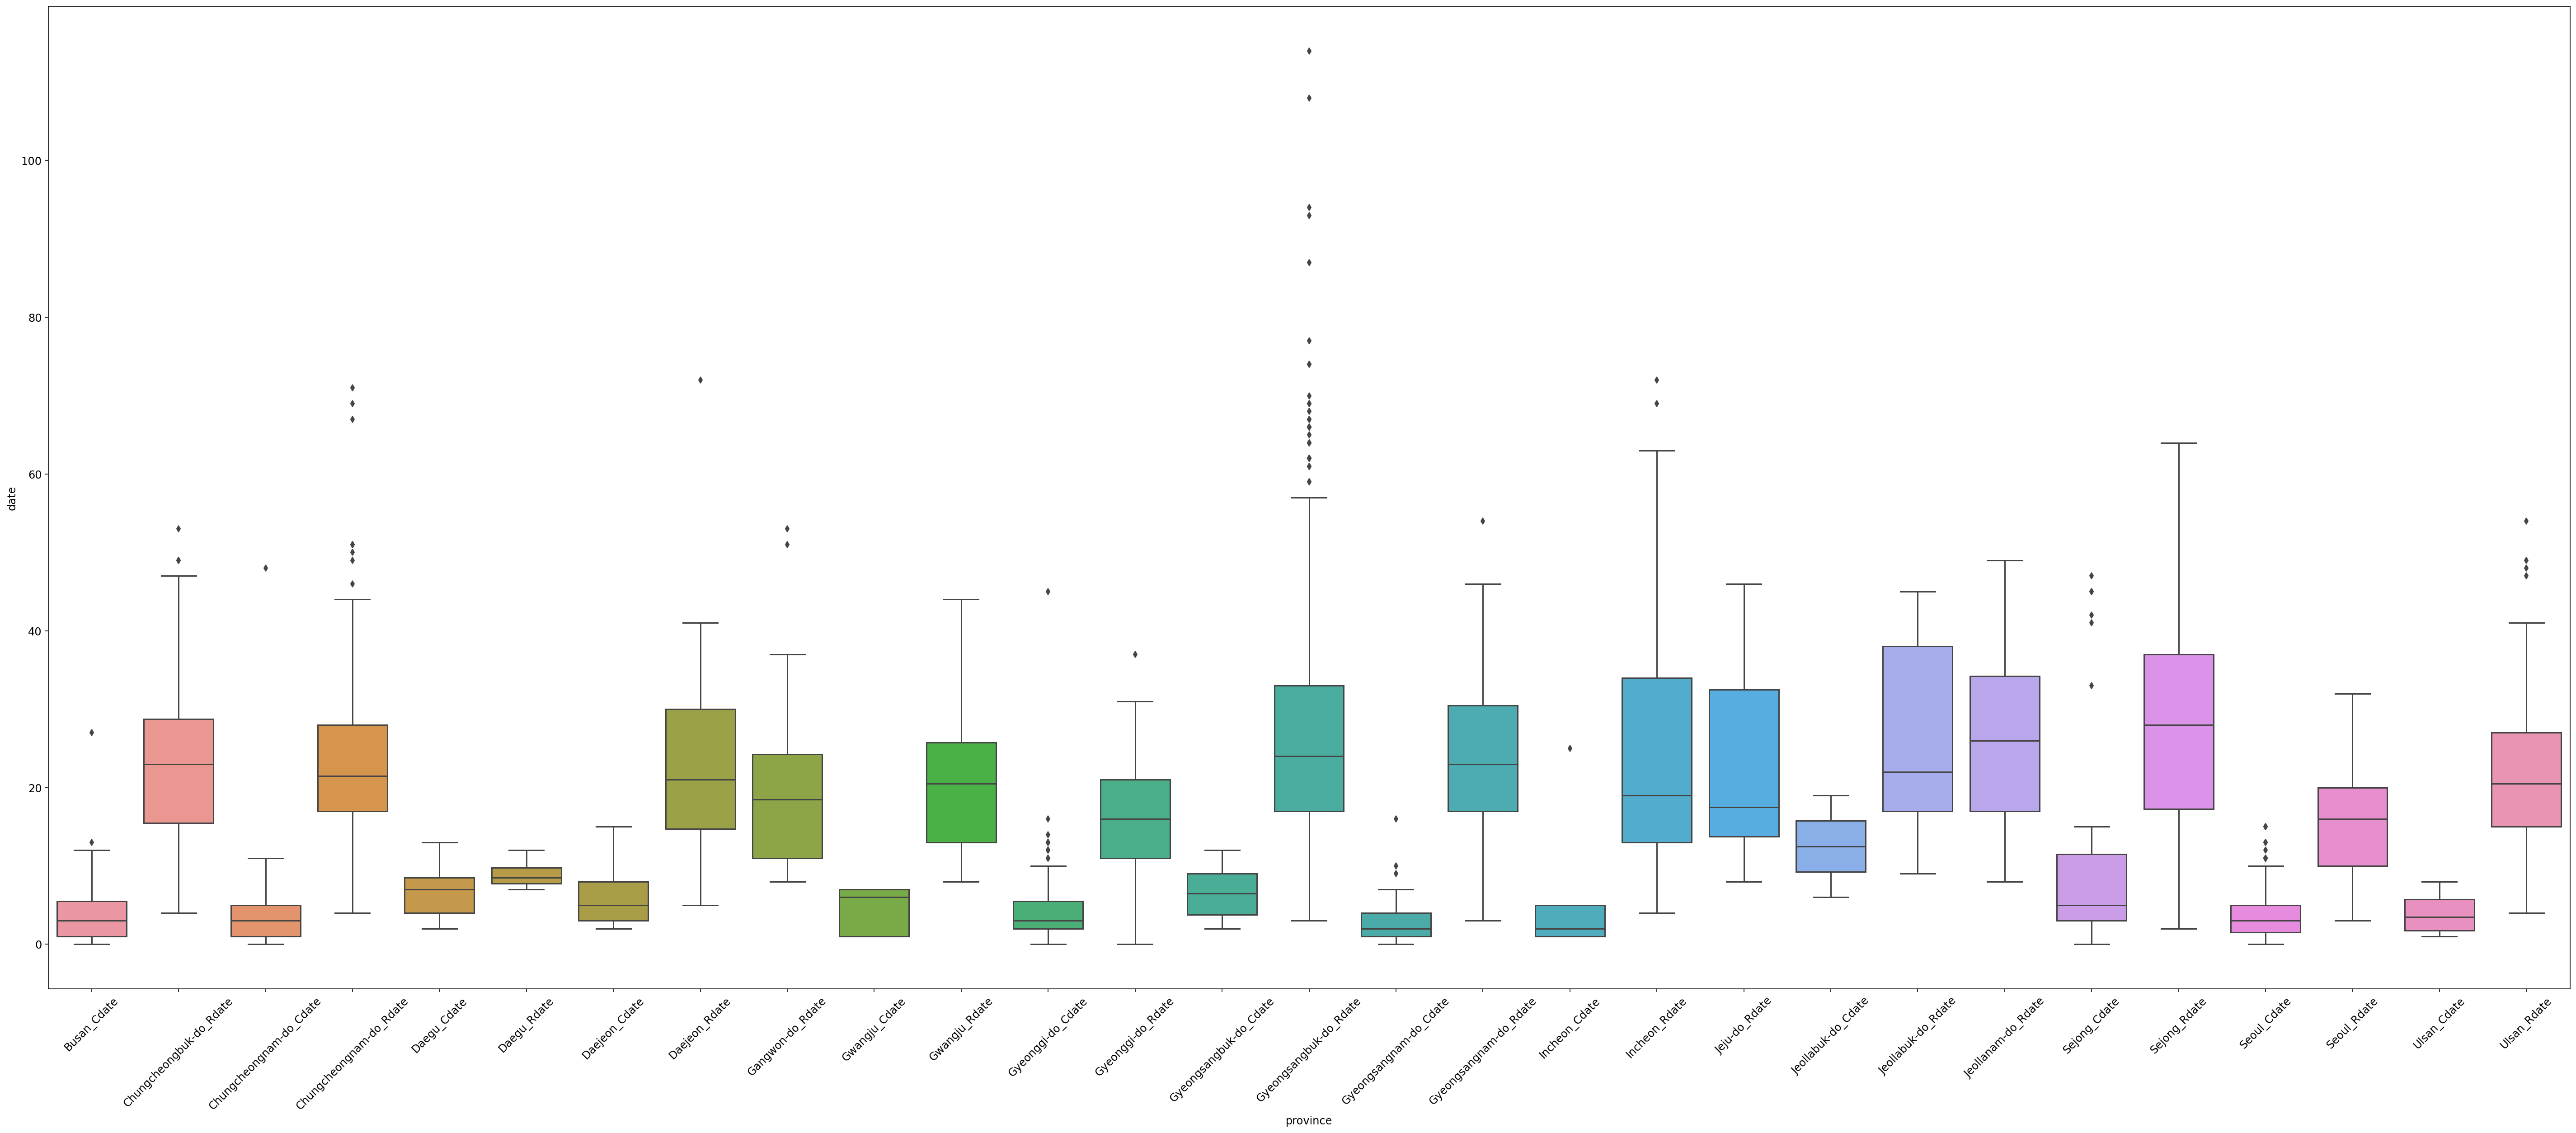

In [135]:
United=pd.read_csv('/content/United.csv')
fig = plt.figure(figsize=(50, 20))
sns.boxplot(y = United['date'], x = "province", data=United)
pyplot.xticks(rotation=45)

plt.show

**전반적으로 회복기간이 확진검증기간보다 길다.**

In [139]:
bothof=pd.read_csv('/content/bothof.csv')
print(bothof["confirmed_date"].corr(bothof["total_medical"].astype(float)))
print(bothof["confirmed_date"].corr(bothof["sizeofarea"].astype(float)))
print(bothof["recovery_date"].corr(bothof["total_medical"].astype(float)))
print(bothof["recovery_date"].corr(bothof["sizeofarea"].astype(float)))
#회복시간과 확진검증기간과 인구밀집도, 의료시설비율과는 상관이 없다!

0.10795446971735122
-0.042383293719818166
0.1833883501916537
-0.19721023642278093


**3-2. 감염률,회복율,사망률와 의료기관비율과 인구밀도와의 상관관계**

In [136]:
allofdf=pd.read_csv('/content/allofdf.csv')

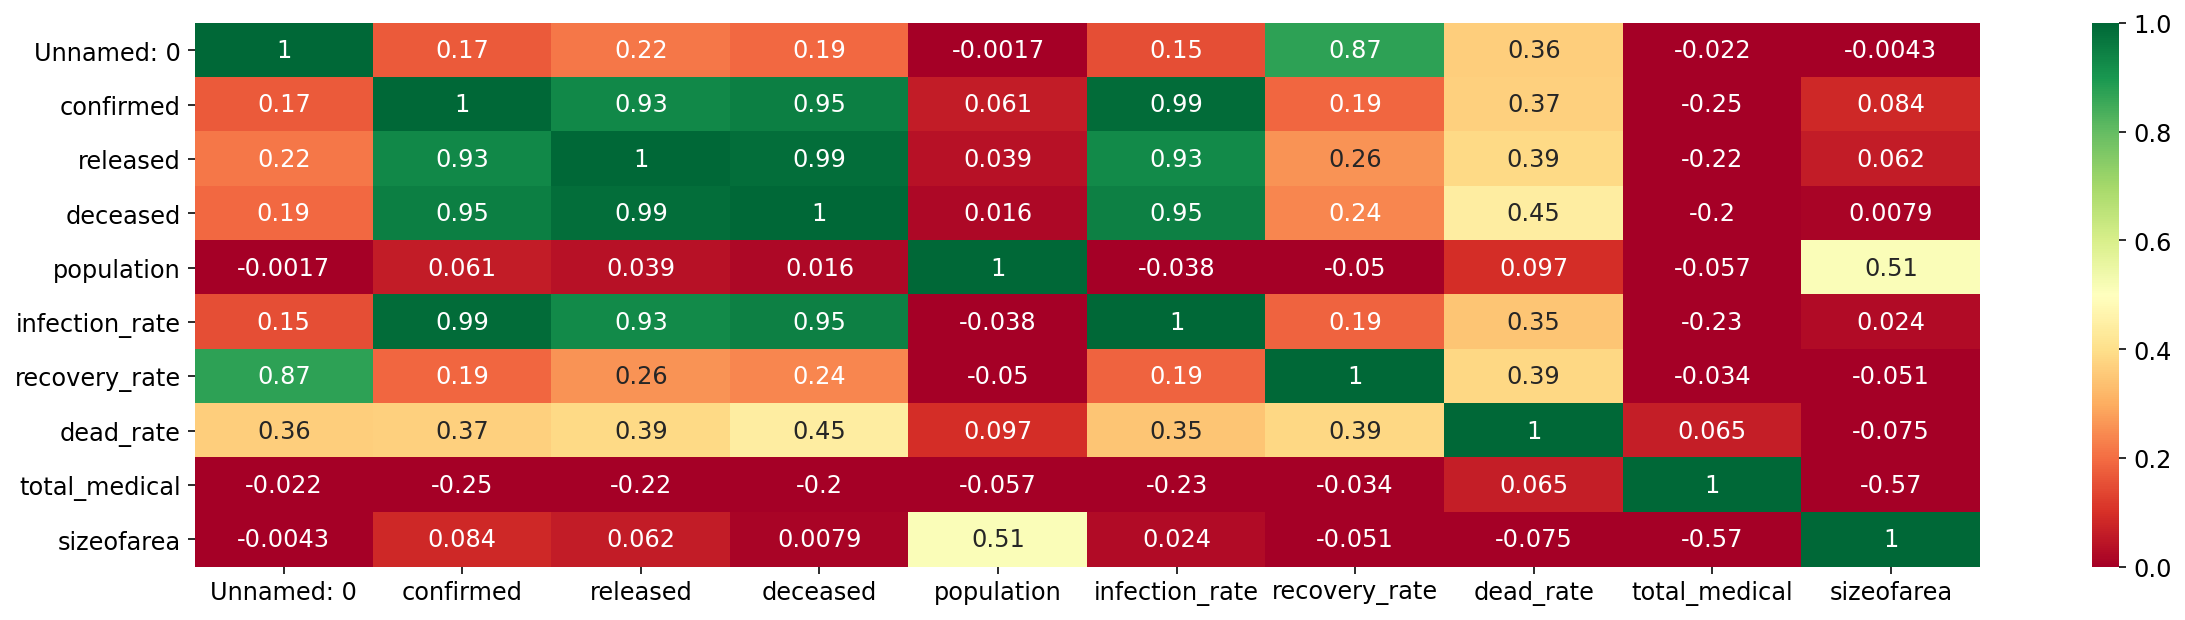

In [137]:
corr = allofdf.corr()

plt.figure(figsize=(20,5))
sns.heatmap(corr, cmap = "RdYlGn", annot = True, vmin=0, vmax=1) 
#인구밀도와 의료시설비율은 감염률, 사망률, 회복률과 전혀 상관없다.

**3-3. 감염경로와 의료기관비율과 인구밀도와의 상관관계**

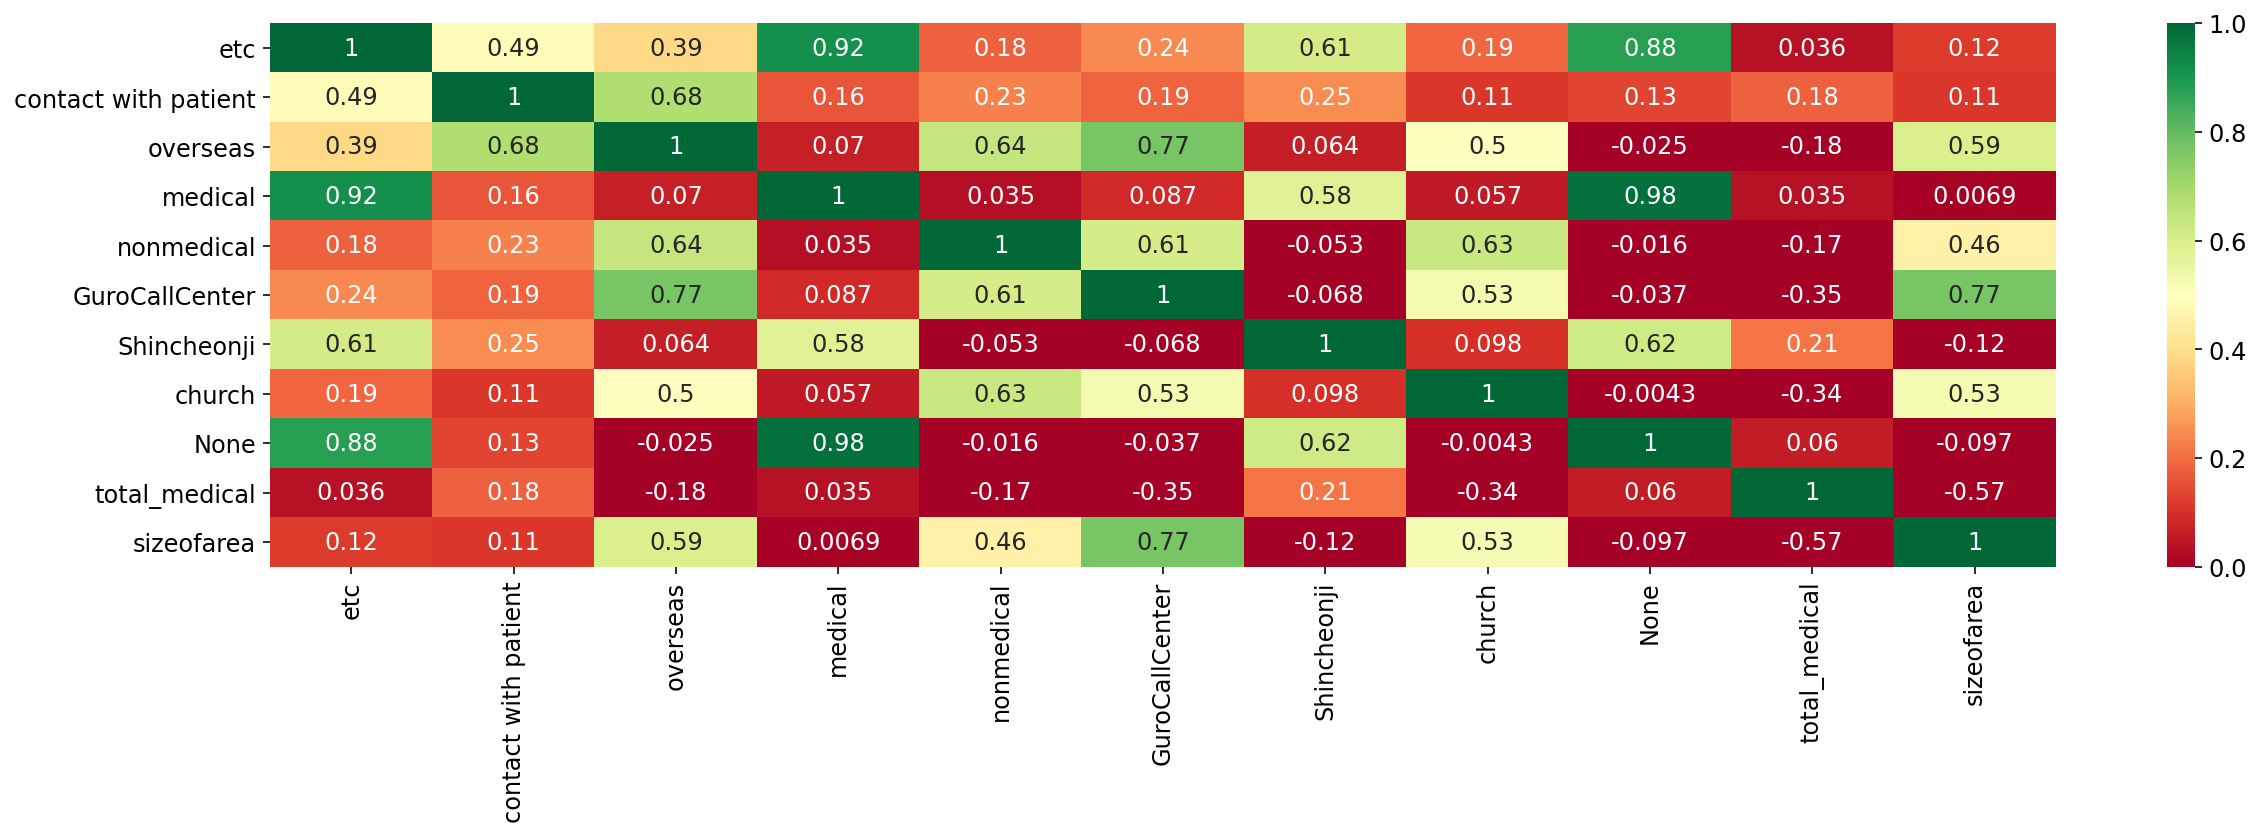

2번에 감염경로를 조사할 때, 인천과 서울, 경기에서 주로 해외경로 감염경로의 경우가 주로 나왔습니다.

구로콜센터 또한 인천과 서울에서 주로 감염경로로 등장하여 원래 지역당 의료시설비율과 연관이 있을 것이라고 예상했지만 인구밀집도도 연관있을 것이라고 예상했습니다.

위의 상관관계를 보면 구로콜센터가 인구밀집도와 매우 연관 있고 해외유입, 교회의 경우도 인구밀집도와 0.5정도 연관있습니다.

# 4. 결론



1.   의료인프라(의료시설비율)이 확진검증기간, 회복기간이나 감염자 추이에 연관이 있을 것이라고 생각했지만 상관이 거의 없었습니다.

   -> 20.1분기 20.2분기의 의료시설 수가 크게 차이가 나지 않는 원인과 감염경로 중에 의료 관련 시설(medical)을 따로 범주를 만들어서 관찰했지만 거의 모든 지역의 감염경로에 많은 비중이 없는 원인이 상관관계가 없는 결과로 나온 것 같습니다.

2.   대구&경북 지역은 20.2월에 신천지로 인해 크게 감염자가 늘어 전체 감염자 추이에 영향을 주었으며 그 이후로는 대구&경북지역은 큰 증가폭을 들어내지 않았습니다.

3. 서울&경기&인천 지역은 신천지 영향은 덜 받았지만 해외 유입과 환자 접촉 경로로 인해 꾸준히 증가하는 추세를 보였습니다.

4. 감염경로 중에 Nan값은 대부분 신천지 감염경로인 걸로 추정됩니다. 이유는 대구&경북 지역에 신천지가 터져 확진자가 많이 나오는 시기에 신천지 감염경로와 같이 크게 증가하고 그 이후로는 신천지 감염경로의 확진자 증가 추세와 유사했기 때문입니다. 또한 서울&경기&인천 지역에는 Nan 감염경로가 거의 없었습니다.

5. 의료인프라(의료시설비율 - 한 지역에 하나의 의료시설 당 인구수)는 회복속도, 확진검증속도, 감염경로에 영향을 주지 않았지만 인구밀집도(한 지역에 면적당 인구수)는 몇몇 감염경로(구로콜센터,교회,해외유입)와 상관관계가 존재하는 것을 확인했습니다.(각각 0.77, 0.5, 0.59)

  -> 구로콜센터는 주로 인천&서울, 해외유입은 주로 인천&서울&경기에서 일어났기에 그 지역의 공통점은 인구밀집도가 다른 지역보다는 유사한 공통점을 가지기에 이러한 결과가 나왔다고 생각합니다.

  -> 또한 20.5월이후로 인천&경기 지역에 환자와의 접촉 감염경로로 급증하는 것을 보아 더 많은 데이터가 있다면 인구밀집도와 더 상관관계를 보였을 것 같습니다.

